# Import des librairies

In [2]:
import numpy as np
import pandas as pd
import missingno as msno

# Etape 1 : Menez une analyse générale des données


## Import des datasets

### EdStatsCountry

In [6]:
country_df = pd.read_csv("./Datasets/EdStatsCountry.csv")

### EdStatsCountry-Series

In [8]:
country_series_df = pd.read_csv("./Datasets/EdStatsCountry-Series.csv")

### EdStatsData

In [10]:
data_df = pd.read_csv("./Datasets/EdStatsData.csv")

### EdStatsFootNote

In [12]:
footnote_df = pd.read_csv("./Datasets/EdStatsFootNote.csv")

### EdStatsSeries

In [14]:
series_df = pd.read_csv("./Datasets/EdStatsSeries.csv")

## Analyse du dataset EdStatsCountry

### Affichons les premières lignes du dataset

In [17]:
country_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [19]:
nombre_lignes = country_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = country_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 241 lignes dans ce dataset
Il y a 32 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [21]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### Analyse du type des données présentes dans le dataset

In [23]:
country_df.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

### Vérifions si des valeurs sont manquantes dans le dataset

In [25]:
country_df.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [26]:
somme_nan = country_df.isnull().sum().sum()
print(f"Il y a {somme_nan} valeurs manquantes dans le dataset")

Il y a 2354 valeurs manquantes dans le dataset


### Vérifions si des valeurs sont dupliquées dans le dataset

In [28]:
country_df_duplicate = country_df[country_df.duplicated("Country Code")]
print(f"Il y a {country_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les différents pays contenus dans l'étude.
- Le jeu de données contient 241 lignes et 32 colonnes.
- Nous pouvons constater qu'il manque 2354 valeurs sur l'ensemble du dataset.
- Il ne semble pas y avoir de doublons de pays.

Notes :
- Les informations concernant la "region" et "l'income group" peuvent être pertinentes pour le reste de l'analyse.
- La colonne "Unnamed: 31" est complètement vide et pourra être supprimée.

## Analyse du dataset EdStatsCountry-Series

### Affichons les premières lignes du dataset

In [32]:
country_series_df.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [34]:
nombre_lignes = country_series_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = country_series_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 613 lignes dans ce dataset
Il y a 4 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [36]:
country_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


### Analyse du type des données présentes dans le dataset

In [38]:
country_series_df.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [40]:
country_series_df.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

### Vérifions si des valeurs sont dupliquées dans le dataset

In [42]:
country_series_df_duplicate = country_series_df[country_series_df.duplicated()]
print(f"Il y a {country_series_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les sources des indicateurs par pays.
- Le jeu de données contient 613 lignes et 4 colonnes.
- Il ne semble pas y avoir de doublons.

Notes :
- La colonne "Unnamed: 3" est complètement vide et pourra être supprimée

## Analyse du dataset EdStatsData

### Affichons les premières lignes du dataset

In [46]:
data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [48]:
nombre_lignes = data_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = data_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 886930 lignes dans ce dataset
Il y a 70 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [50]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### Analyse du type des données présentes dans le dataset

In [52]:
data_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [54]:
data_df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

<Axes: >

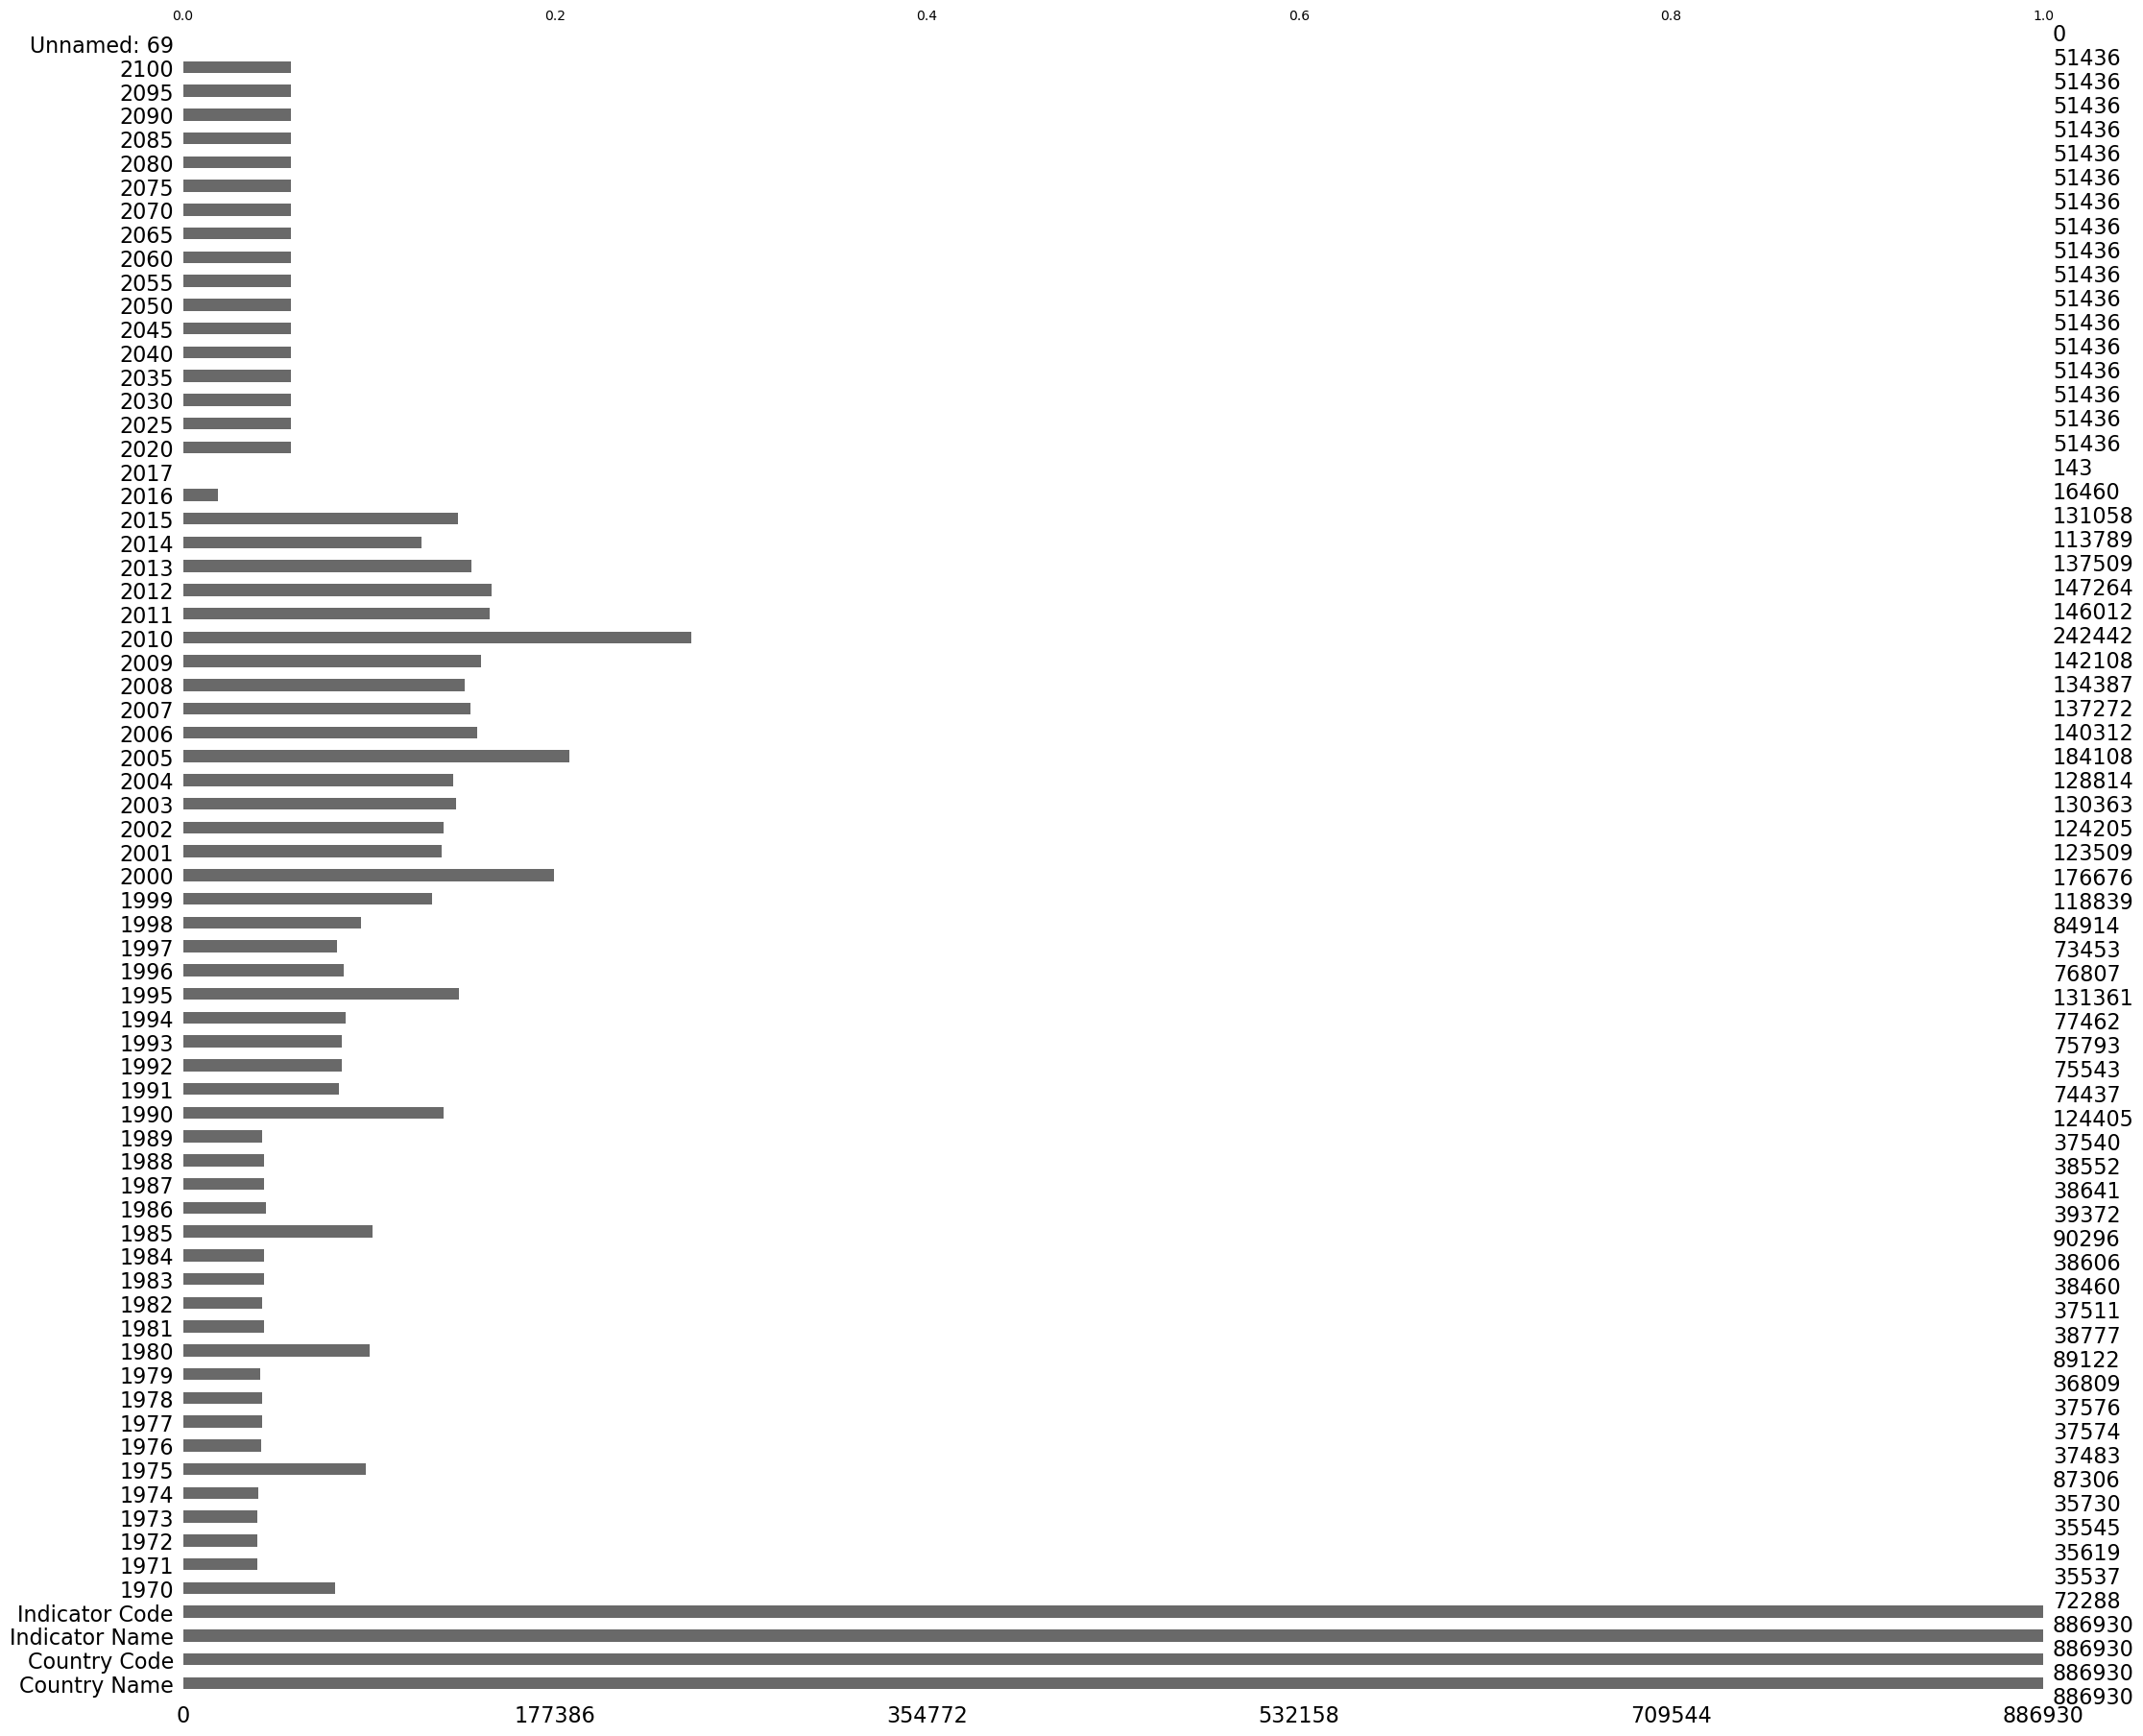

In [55]:
msno.bar(data_df)

### Vérifions si des valeurs sont dupliquées dans le dataset

In [57]:
data_df_duplicate = data_df[data_df.duplicated()]
print(f"Il y a {data_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente les données des différents par pays et pour un semble d'années.
- Le jeu de données contient 886930 lignes et 70 colonnes.
- Nous pouvons constater qu'il manque un nombre important de données, notamment :
    - Après 2015
    - On constate que beaucoup plus de données sont présentes à partir de 1990
- Il ne semble pas y avoir de doublons.

Notes :
- La colonne "Unnamed: 69" est complètement vide et pourra être supprimée

In [59]:
data_df_duplicate = data_df[data_df.duplicated()]
print(f"Il y a {data_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


## Analyse du dataset EdStatsFootNote

### Affichons les premières lignes du dataset

In [62]:
footnote_df.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [64]:
nombre_lignes = footnote_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = footnote_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 643638 lignes dans ce dataset
Il y a 5 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [66]:
footnote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


### Analyse du type des données présentes dans le dataset

In [68]:
footnote_df.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [70]:
footnote_df.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

### Vérifions si des valeurs sont dupliquées dans le dataset

In [72]:
footnote_df_duplicate = footnote_df[footnote_df.duplicated()]
print(f"Il y a {footnote_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Le jeu de données contient 643638 lignes et 5 colonnes.
- Il ne semble pas y avoir de doublons.

Notes :
- La colonne "Unnamed: 4" est complètement vide et pourra être supprimée

## Analyse du dataset EdStatsSeries

### Affichons les premières lignes du dataset

In [76]:
series_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse de la forme du dataset, nombre de lignes et de colonnes

In [78]:
nombre_lignes = series_df.shape[0]
print(f"Il y a {nombre_lignes} lignes dans ce dataset")
nombre_colonnes = series_df.shape[1]
print(f"Il y a {nombre_colonnes} colonnes dans ce dataset")

Il y a 3665 lignes dans ce dataset
Il y a 21 colonnes dans ce dataset


### Affiche des informations générales sur le dataset

In [80]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

### Analyse du type des données présentes dans le dataset

In [82]:
series_df.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

### Vérifions si des valeurs sont manquantes dans le dataset

In [84]:
series_df.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

### Vérifions si des valeurs sont dupliquées dans le dataset

In [86]:
series_df_duplicate = series_df[series_df.duplicated()]
print(f"Il y a {series_df_duplicate.shape[0]} valeurs dupliquées dans ce dataset")

Il y a 0 valeurs dupliquées dans ce dataset


### Conclusion

- Ce dataset présente la description des différents indicateurs présents dans l'étude.
- Le jeu de données contient 3665 lignes et 21 colonnes.
- Nous pouvons constater qu'il manque un nombre important de données, cependant la définition longue est présente pour chaque indicateur.
- Il ne semble pas y avoir de doublons.

Notes :
- Nous pourrons nous appuyer sur ce jeu de données pour faire notre sélection d'indicateurs.
- La colonne "Unnamed: 69" est complètement vide et pourra être supprimée

# Etape 2 : Sélectionnez les données pertinentes

## Plage de temps étudiée

Lors de notre analyse du dataframe data, nous avons constaté que les années répertoriant le plus d'informations sont comprises entre 1990 et 2015. 
Commencons par réduire la taille de notre jeu de données data en supprimant les années qui ne semblent pas pertinentes.

In [90]:
# On récupère la liste des colonnes dans une liste
annees = data_df.columns.to_list()

In [91]:
# On supprime les colonnes ne représentant pas des années
annees.remove('Country Name')
annees.remove('Country Code')
annees.remove('Indicator Name')
annees.remove('Indicator Code')
annees.remove('Unnamed: 69')

In [92]:
# Pour chaque année dans la liste, on vérifie si elle est supérieure à 1990 et inférieure à 2015 pour décider ou non de la supprimer
annees_a_suppr = []
for annee in annees :
    if int(annee) < 1990 :
        annees_a_suppr.append(annee)
    elif int(annee) > 2015 :
        annees_a_suppr.append(annee)

In [135]:
# On supprime toutes les colonnes des années que nous avons précédemment sélectionné
data = data_df.drop(labels=annees_a_suppr, axis= 1)

## Consultation d'un expert "métier" pour nous aider dans notre sélection

Celui-ci nous propose des idées d'indicateurs pertinents 
1. Niveau d'éducation de la population :
- Taux de scolarisation dans l'enseignement secondaire et supérieur.
- Taux de diplomation dans le secondaire et l'enseignement supérieur.

2. Compétences numériques :
- Pourcentage de la population avec des compétences de base en informatique ou en technologie numérique.
- Programmes d’éducation technologique ou initiatives gouvernementales liées à l’apprentissage en ligne.

3. Investissement en éducation :
- Dépenses publiques consacrées à l’éducation, particulièrement dans l'enseignement supérieur.
- Politiques nationales favorisant l'accès à l'éducation en ligne ou à distance.

4. Accès aux infrastructures numériques :
- Taux de couverture du réseau internet à haut débit (broadband penetration rate).
- Taux de couverture mobile, en particulier la 4G ou la 5G.

5. Langues parlées :
- Distribution linguistique pour comprendre dans quelles langues les cours en ligne devraient être proposés.

6. Pouvoir d'achat et développement économique :
- Revenu moyen par habitant ou PIB par habitant, pour évaluer la capacité des familles ou des étudiants à investir dans des services éducatifs en ligne.

7. Taux de chômage des jeunes :
- Indicateur de la demande potentielle pour des formations en ligne visant à améliorer les compétences et l'employabilité.

8. Démographie des étudiants :
- Proportion de la population âgée de 15 à 24 ans (groupe cible pour des cours de niveau lycée ou universitaire).

Nous utiliserons ces pistes pour la sélection de nos indicateurs

### Créons une liste pour stocker les indicateurs que nous sélectionnerons au fur et à mesure

In [86]:
indicateurs = []

### Notre startup propose des contenus en ligne, intéressons nous donc à la catégorie "Infrastructure: Communications"

In [88]:
series_df.loc[series_df["Topic"]=="Infrastructure: Communications"]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vérifions si nous avons des données pour ces deux indicateurs sur l'ensemble des pays

In [90]:
data_df.loc[data_df["Indicator Code"] == "IT.CMP.PCMP.P2", :].shape[0]

242

Le premier indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

<Axes: >

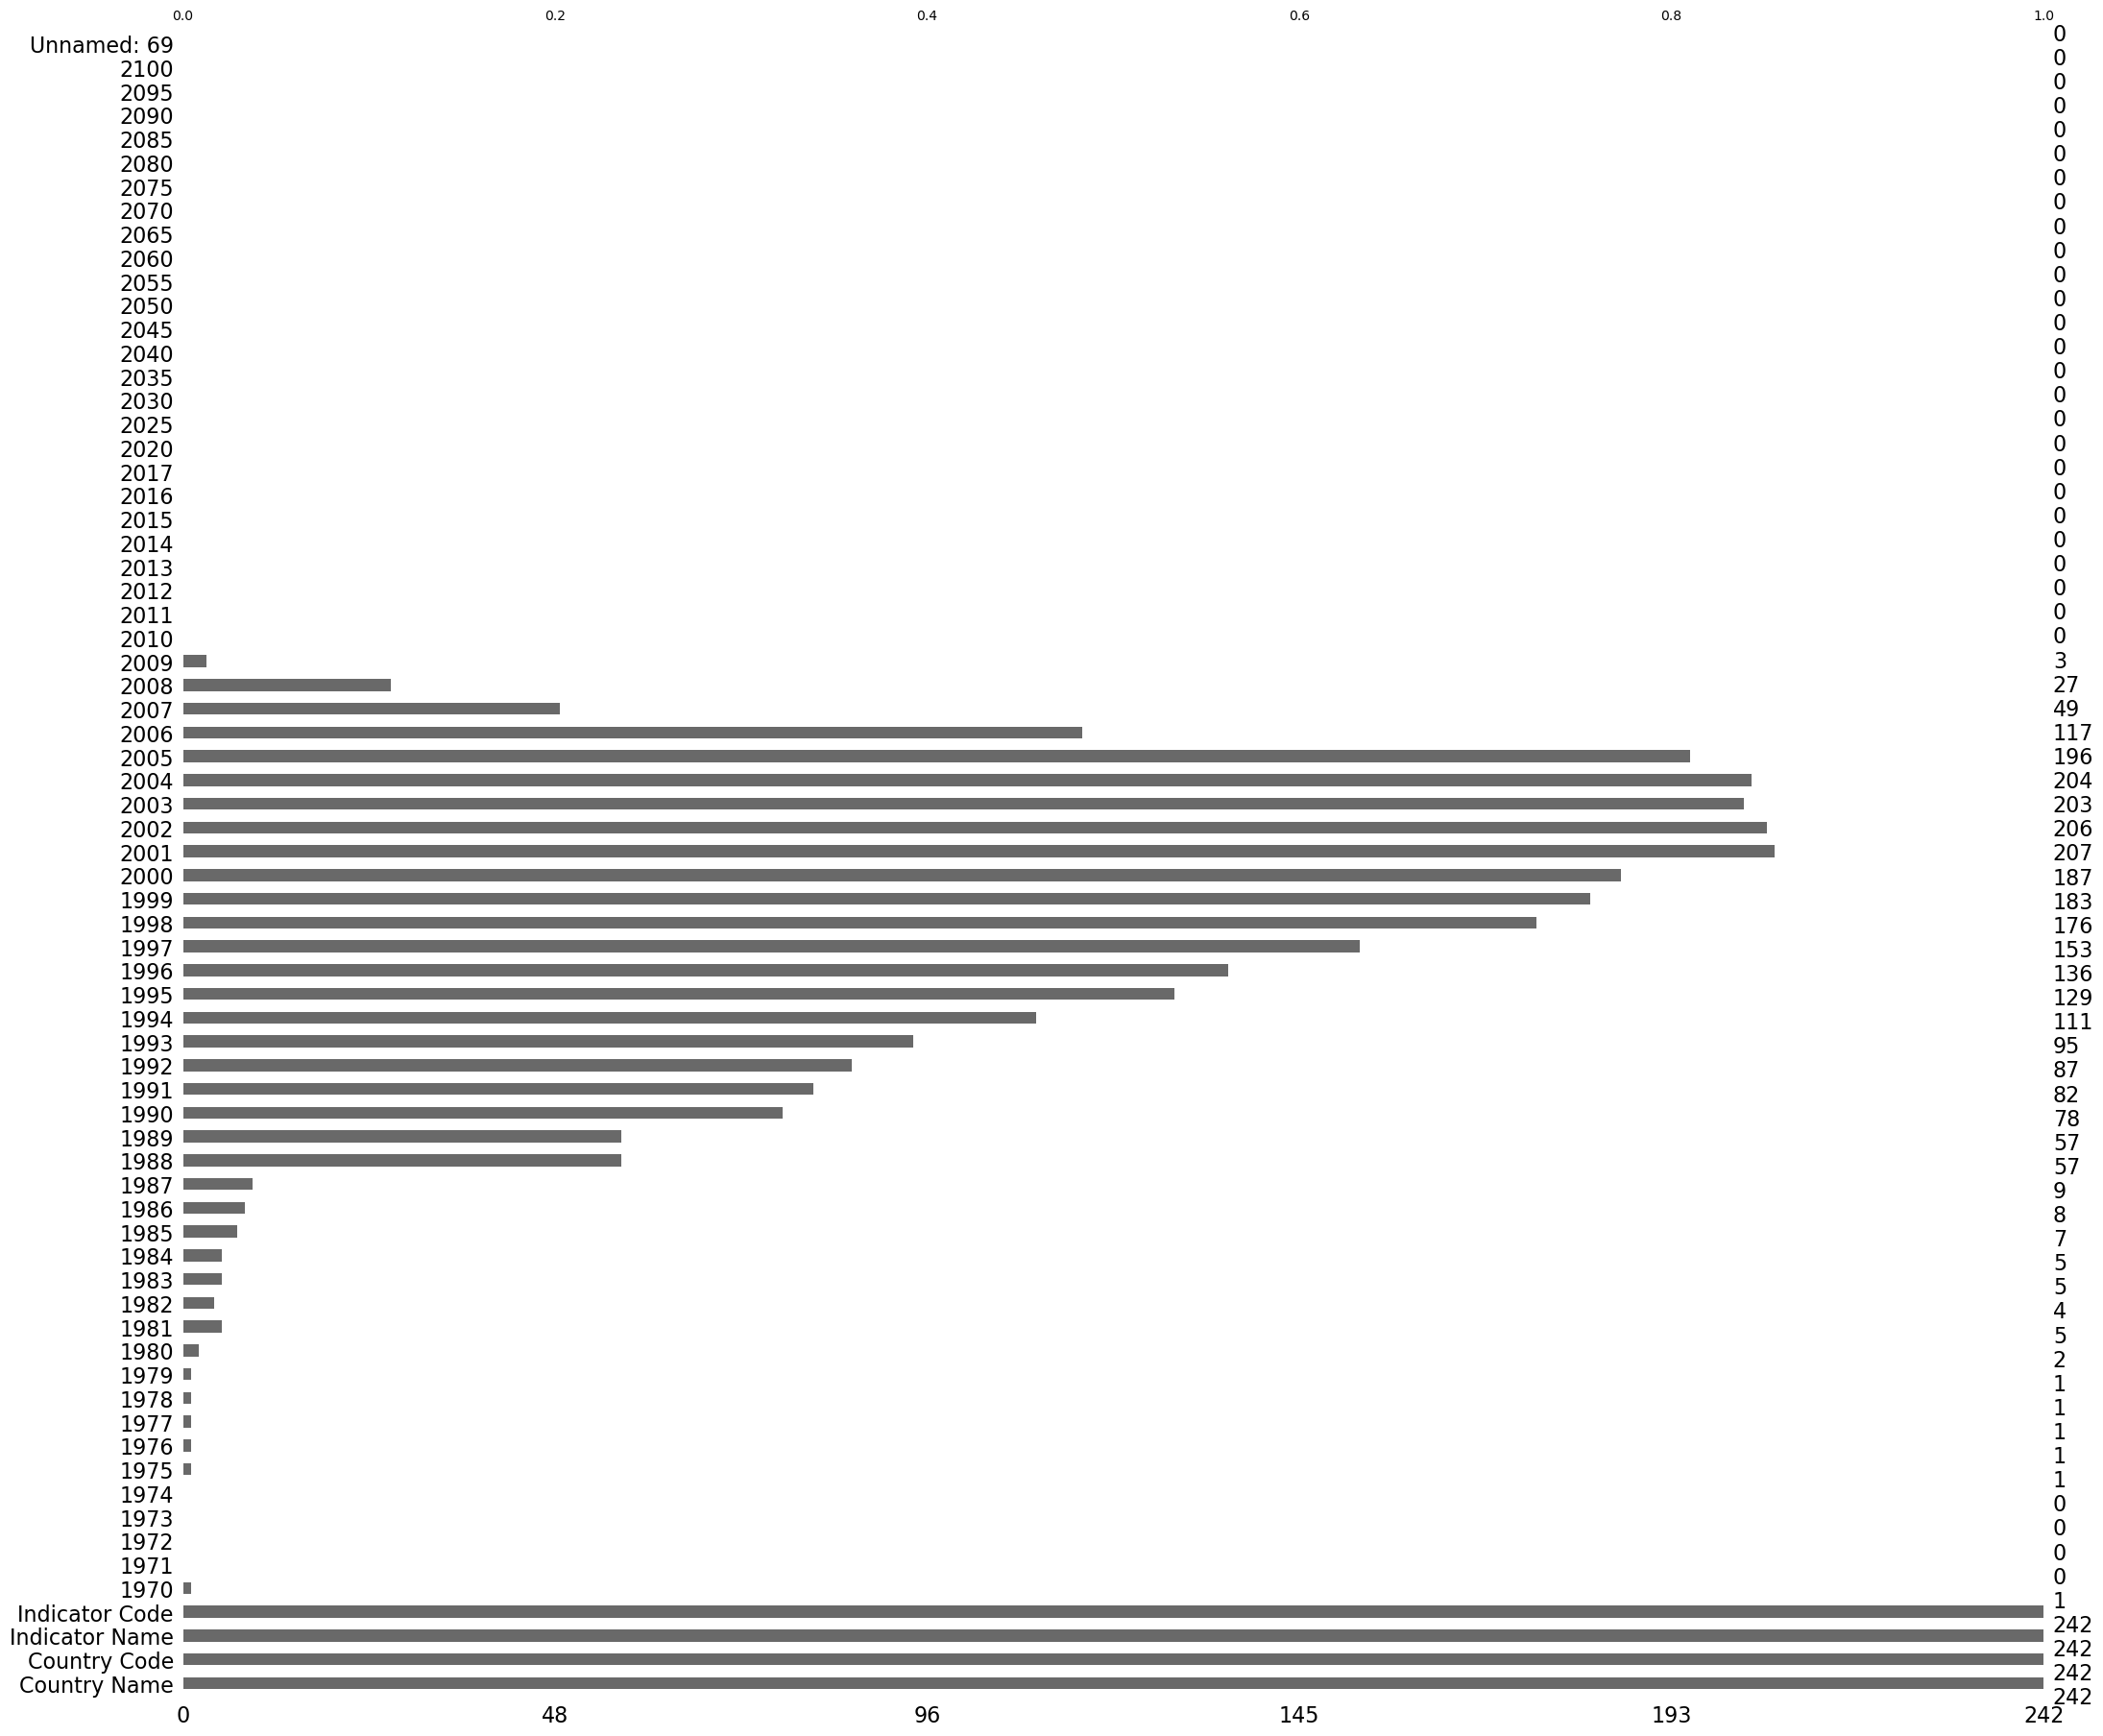

In [92]:
df = data_df.loc[data_df["Indicator Code"] == "IT.CMP.PCMP.P2", :]
msno.bar(df)

In [93]:
indicateurs.append("IT.CMP.PCMP.P2")

In [94]:
data_df.loc[data_df["Indicator Code"] == "IT.NET.USER.P2", :].shape[0]

242

<Axes: >

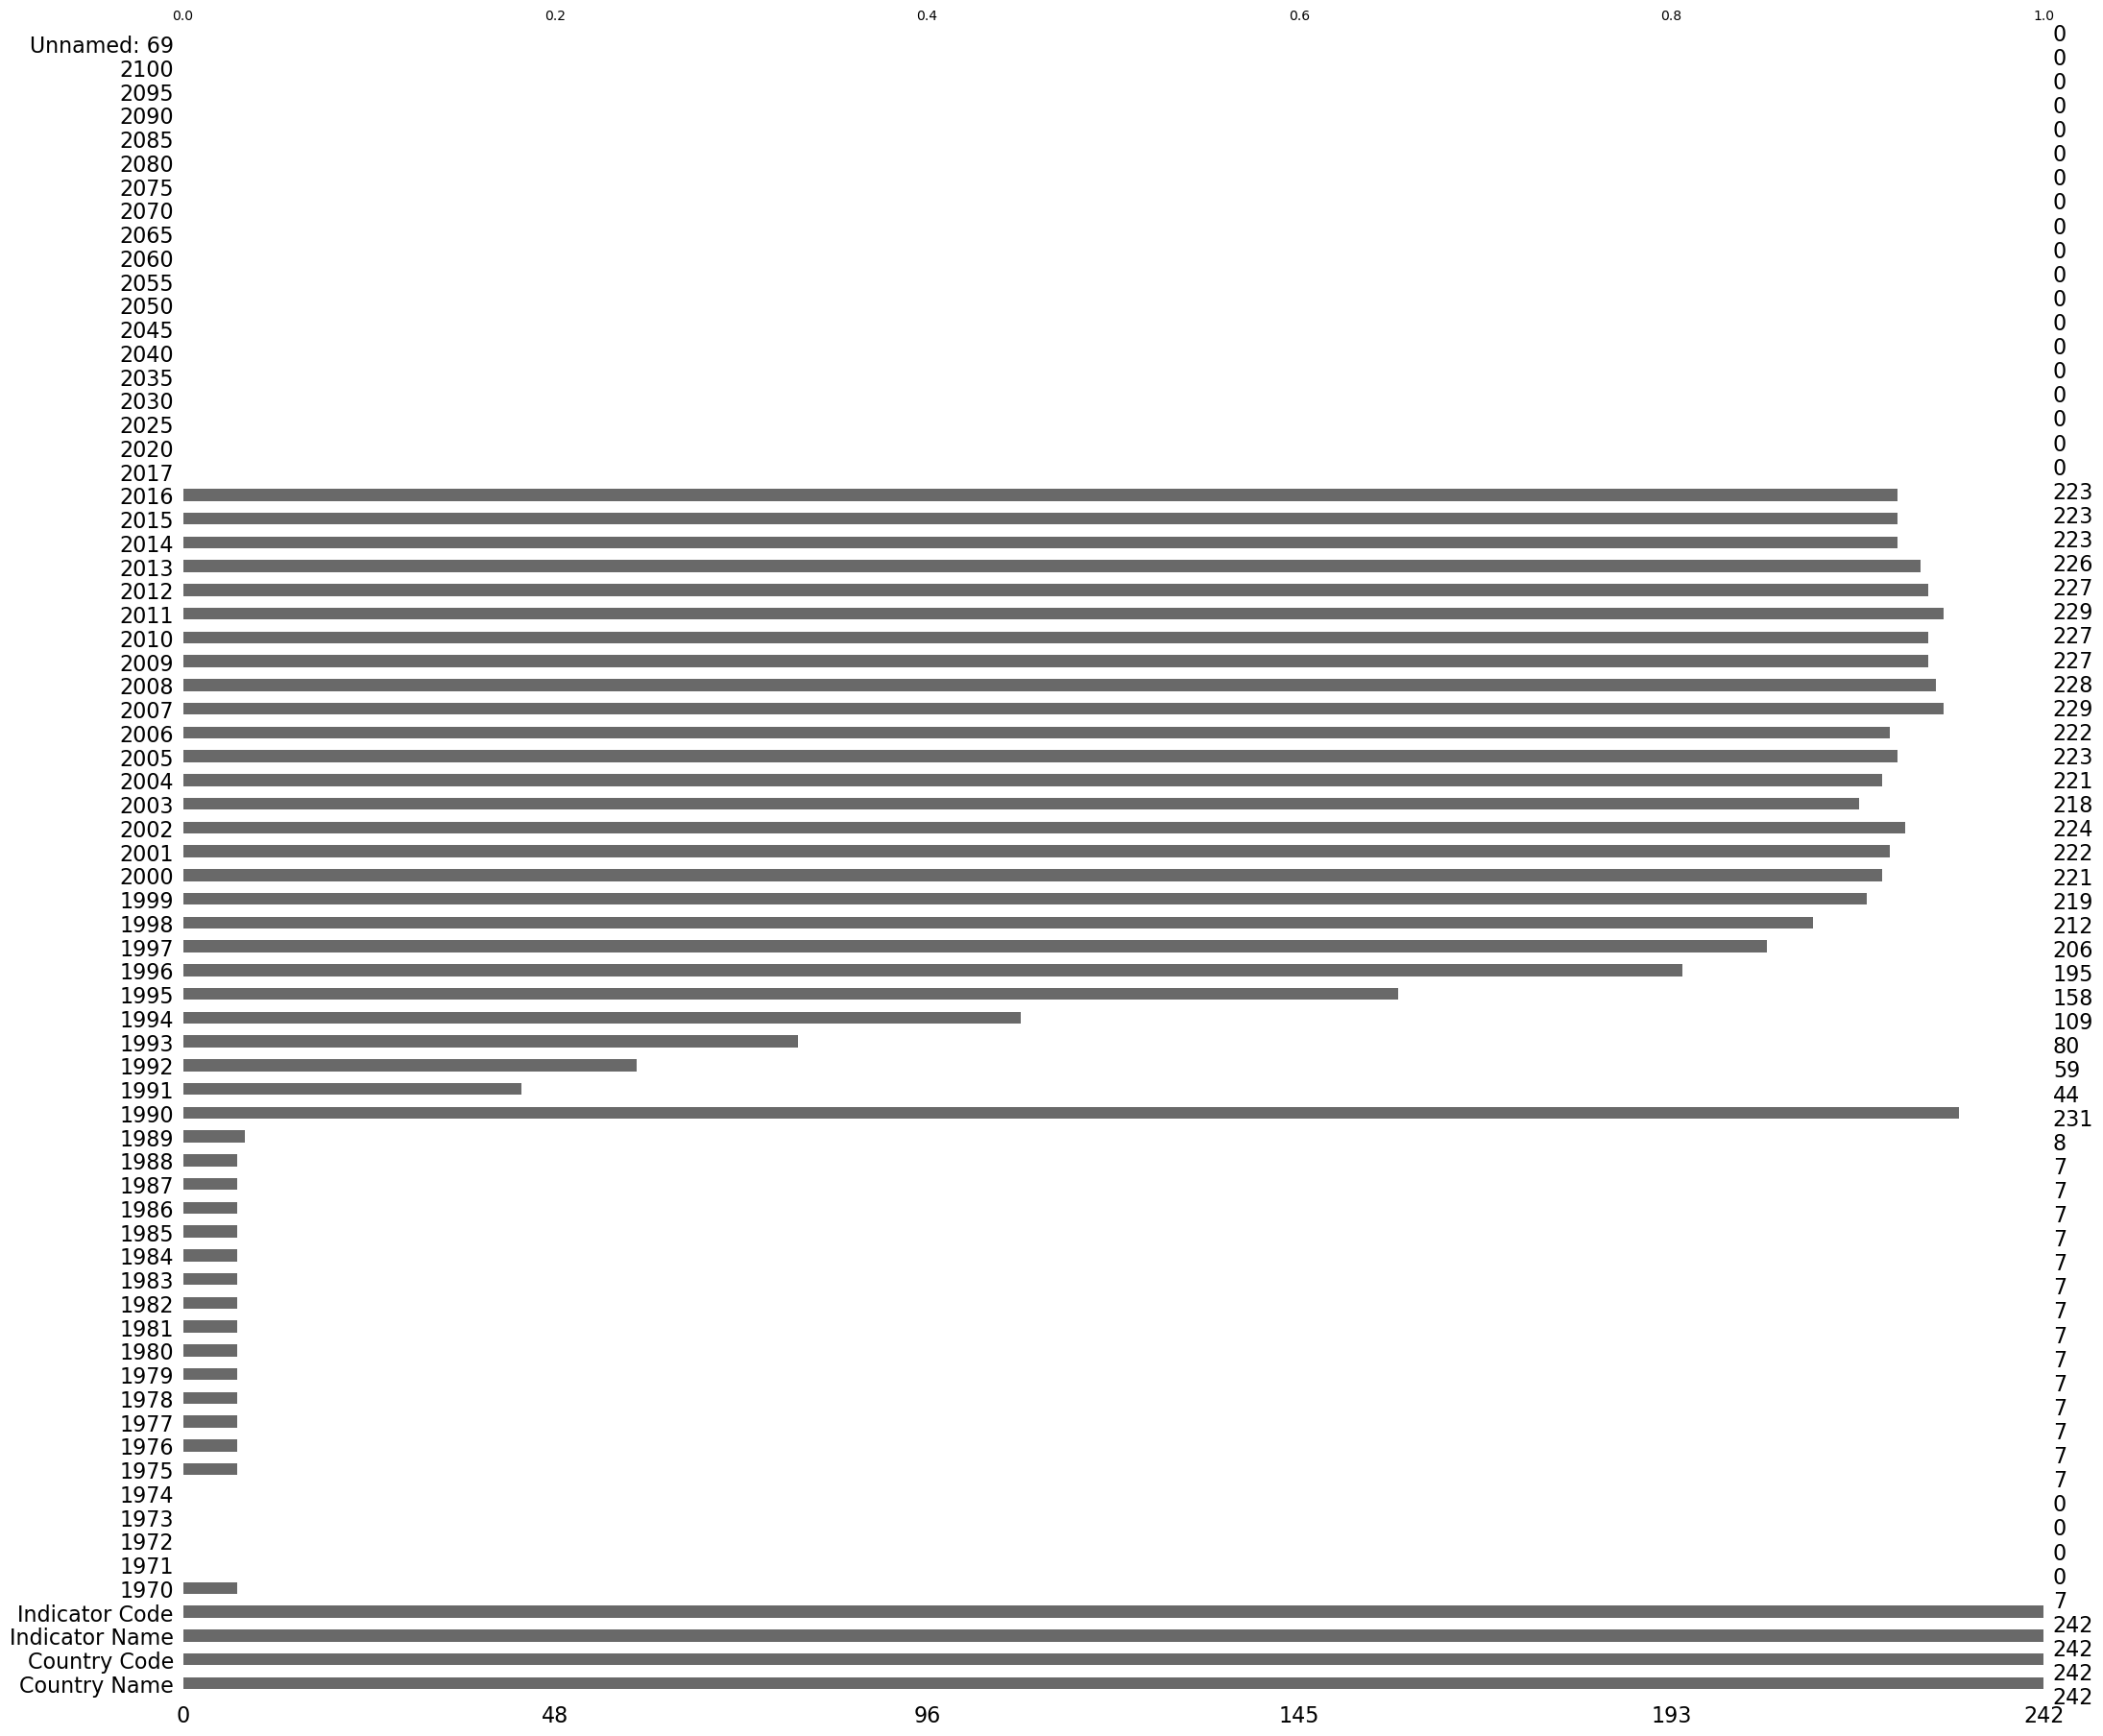

In [95]:
df = data_df.loc[data_df["Indicator Code"] == "IT.NET.USER.P2", :]
msno.bar(df)

Idem pour le second indicateur

Ces deux indicateurs sont donc intéressants pour notre étude :
- Pourcentage de la population ayant un ordinateur
- Pourcentage de la population utilisant internet

In [97]:
indicateurs.append("IT.NET.USER.P2")

#### Recherchons des données sur le taux de scolarisation

##### Dans l'enseignement secondaire

In [100]:
series_df.loc[(series_df["Long definition"].str.contains("Total number of students in the theoretical age group for secondary education enrolled in that level", case=False, na=False))
    & (series_df["Topic"] == "Secondary")
    & (series_df["Long definition"].str.contains("theoretical age group", case=False, na=False))]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2316,SE.SEC.NENR,Secondary,"Net enrolment rate, secondary, both sexes (%)",NaN,Total number of students in the theoretical ag...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cet indicateur présente le nombre total d'élèves en age d'être dans le secondaire qui sont effectivement inscrit dans le secondaire

In [102]:
data_df.loc[data_df["Indicator Code"] == "SE.SEC.NENR", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

<Axes: >

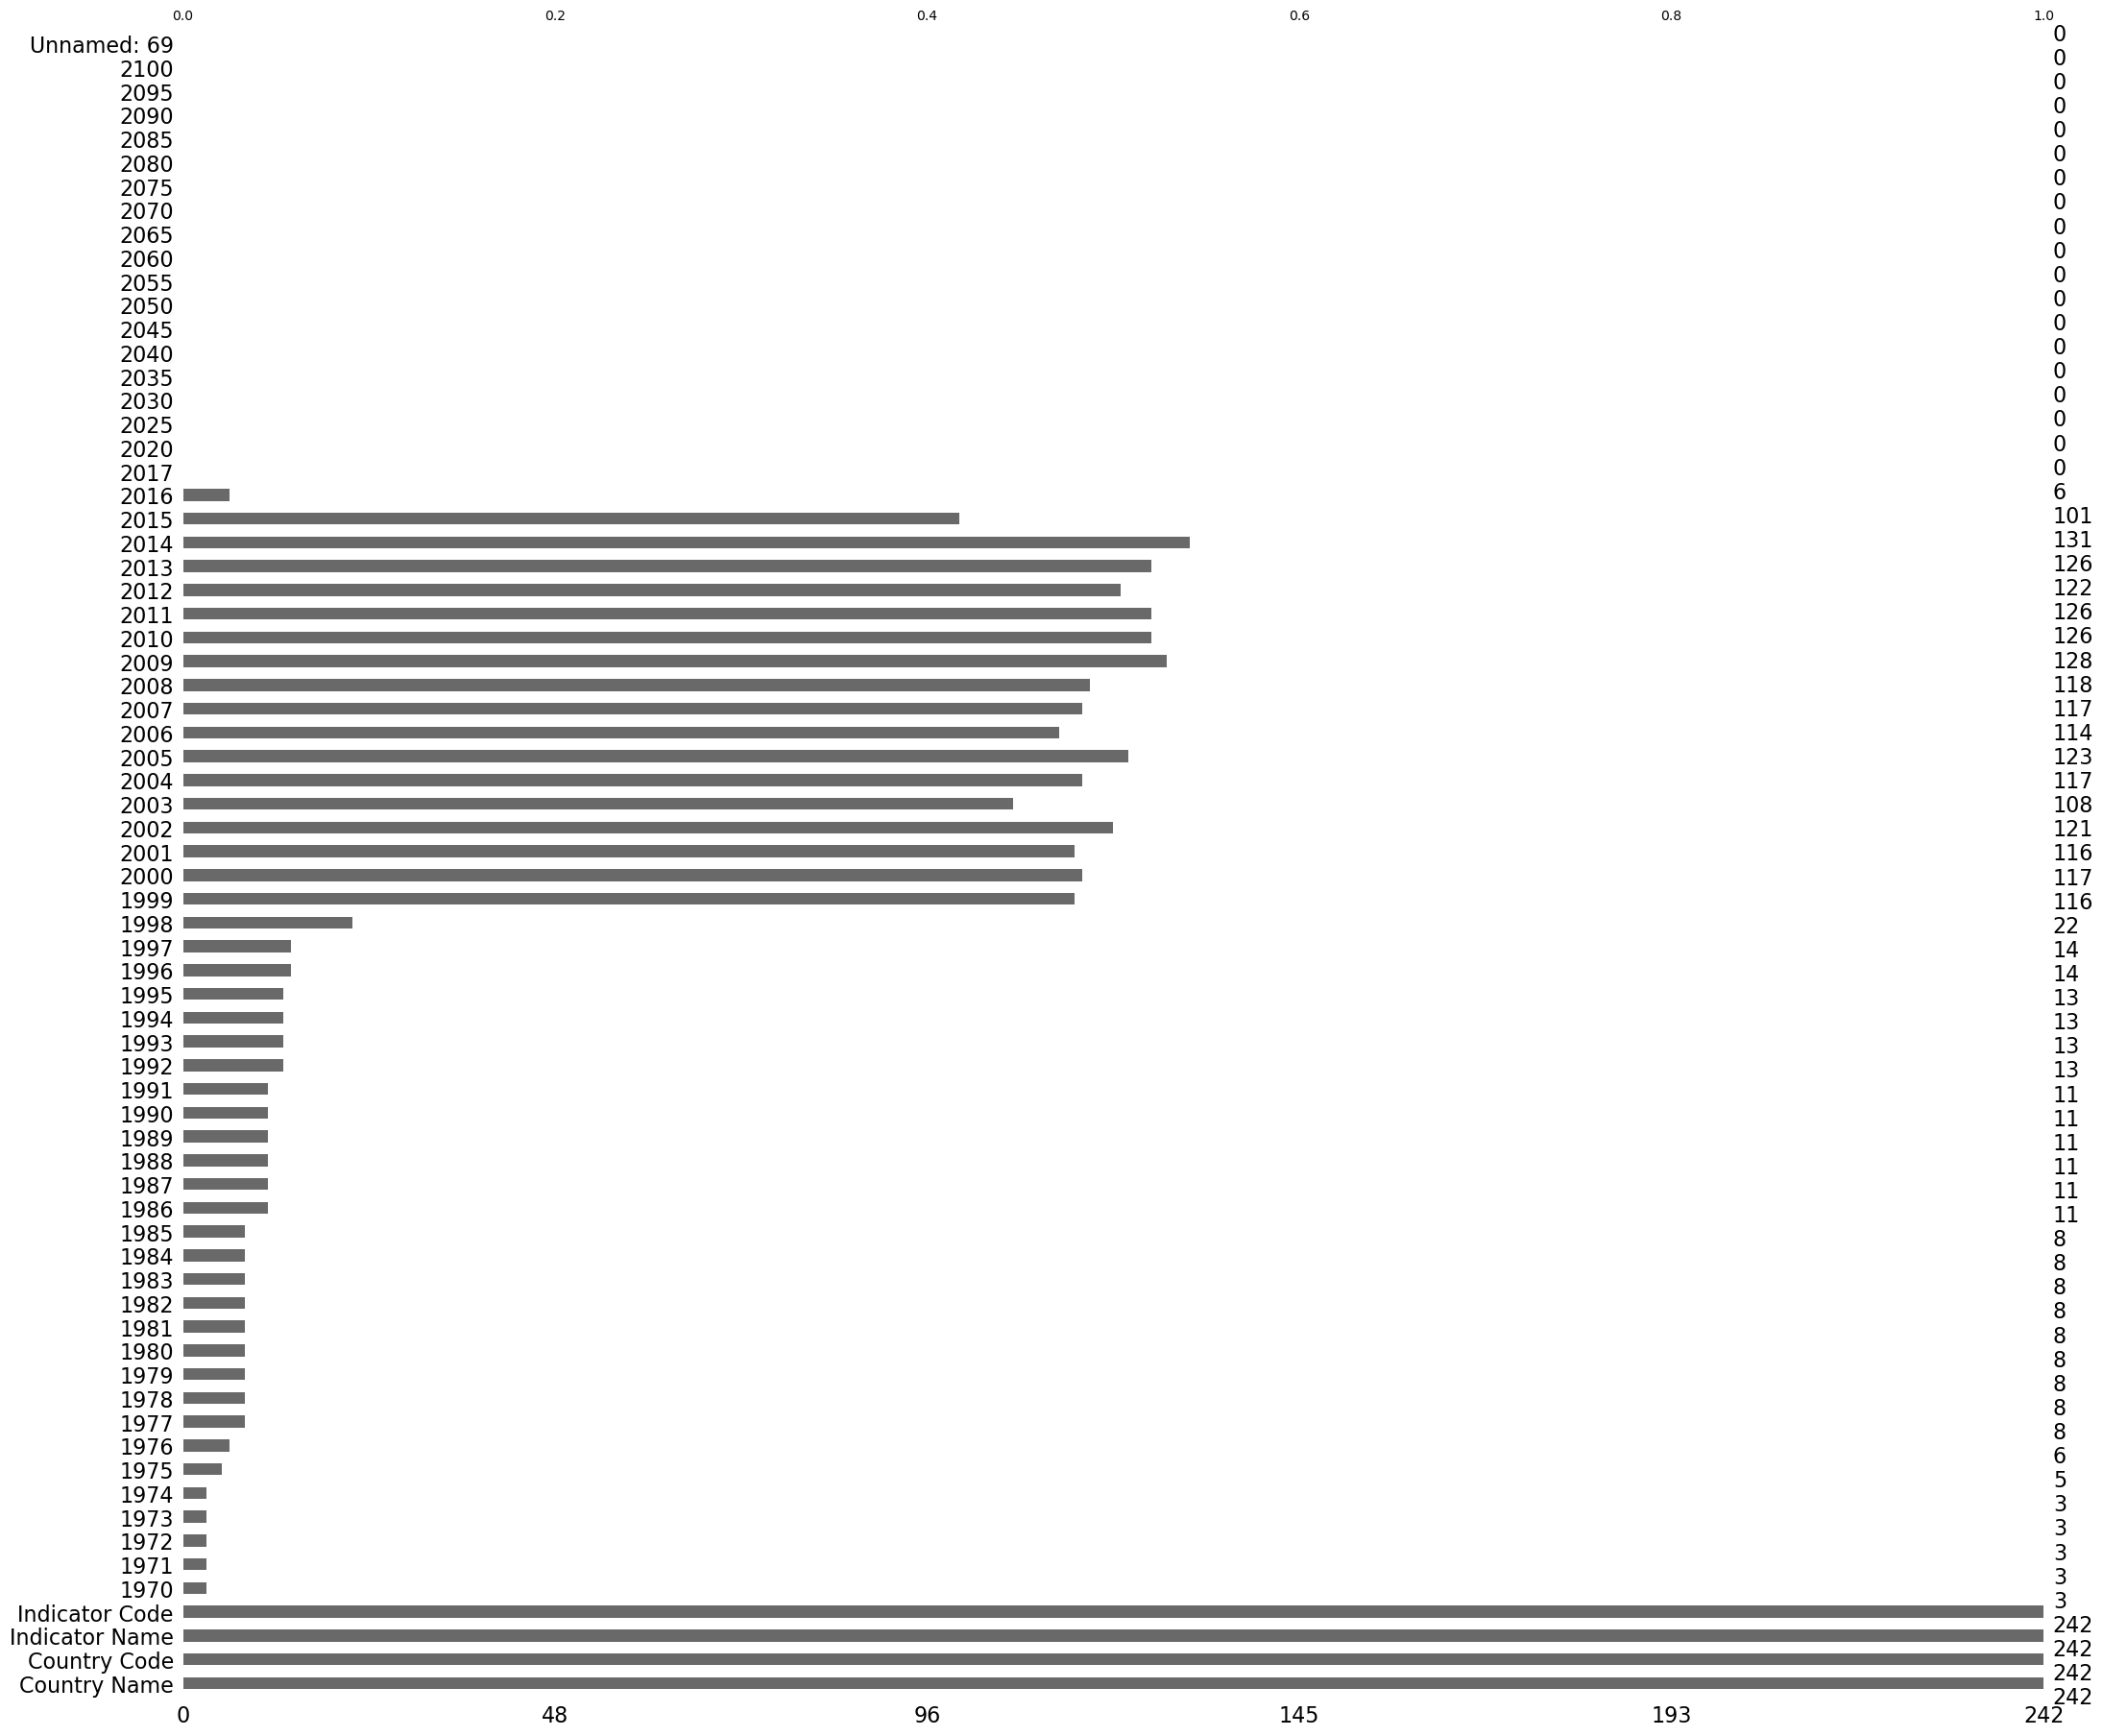

In [104]:
df = data_df.loc[data_df["Indicator Code"] == "SE.SEC.NENR", :]
msno.bar(df)

In [105]:
indicateurs.append("SE.SEC.NENR")

##### Dans l'enseignement supérieur

In [107]:
series_df.loc[(series_df["Long definition"].str.contains("Total enrolment", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]["Long definition"].value_counts()

Long definition
Total enrolment in short-cycle tertiary programmes (ISCED 5) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).              1
Total enrolment in bachelors or equivalent programmes (ISCED 6) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).           1
Total female enrolment in bachelors or equivalent programmes (ISCED 6) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).    1
Total male enrolment in bachelors or equivalent programmes (ISCED 6) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).      1
Total enrolment in masters or equivalent programmes (ISCED 7) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).             1
Total female enrolment in masters or equivalent programmes (ISCED 7) as a percentage of total enrolments in tertiary education (ISCED 5 to 8).      1
Total male enrolment in masters or equivalent programmes (ISCED 7) as a percentage o

In [108]:
series_df.loc[(series_df["Long definition"].str.contains("Total enrolment in short-cycle tertiary programmes", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3536,UIS.TEP.5.B,Tertiary,Percentage of all students in tertiary educati...,NaN,Total enrolment in short-cycle tertiary progra...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
data_df.loc[data_df["Indicator Code"] == "UIS.TEP.5.B", :].shape[0]

242

<Axes: >

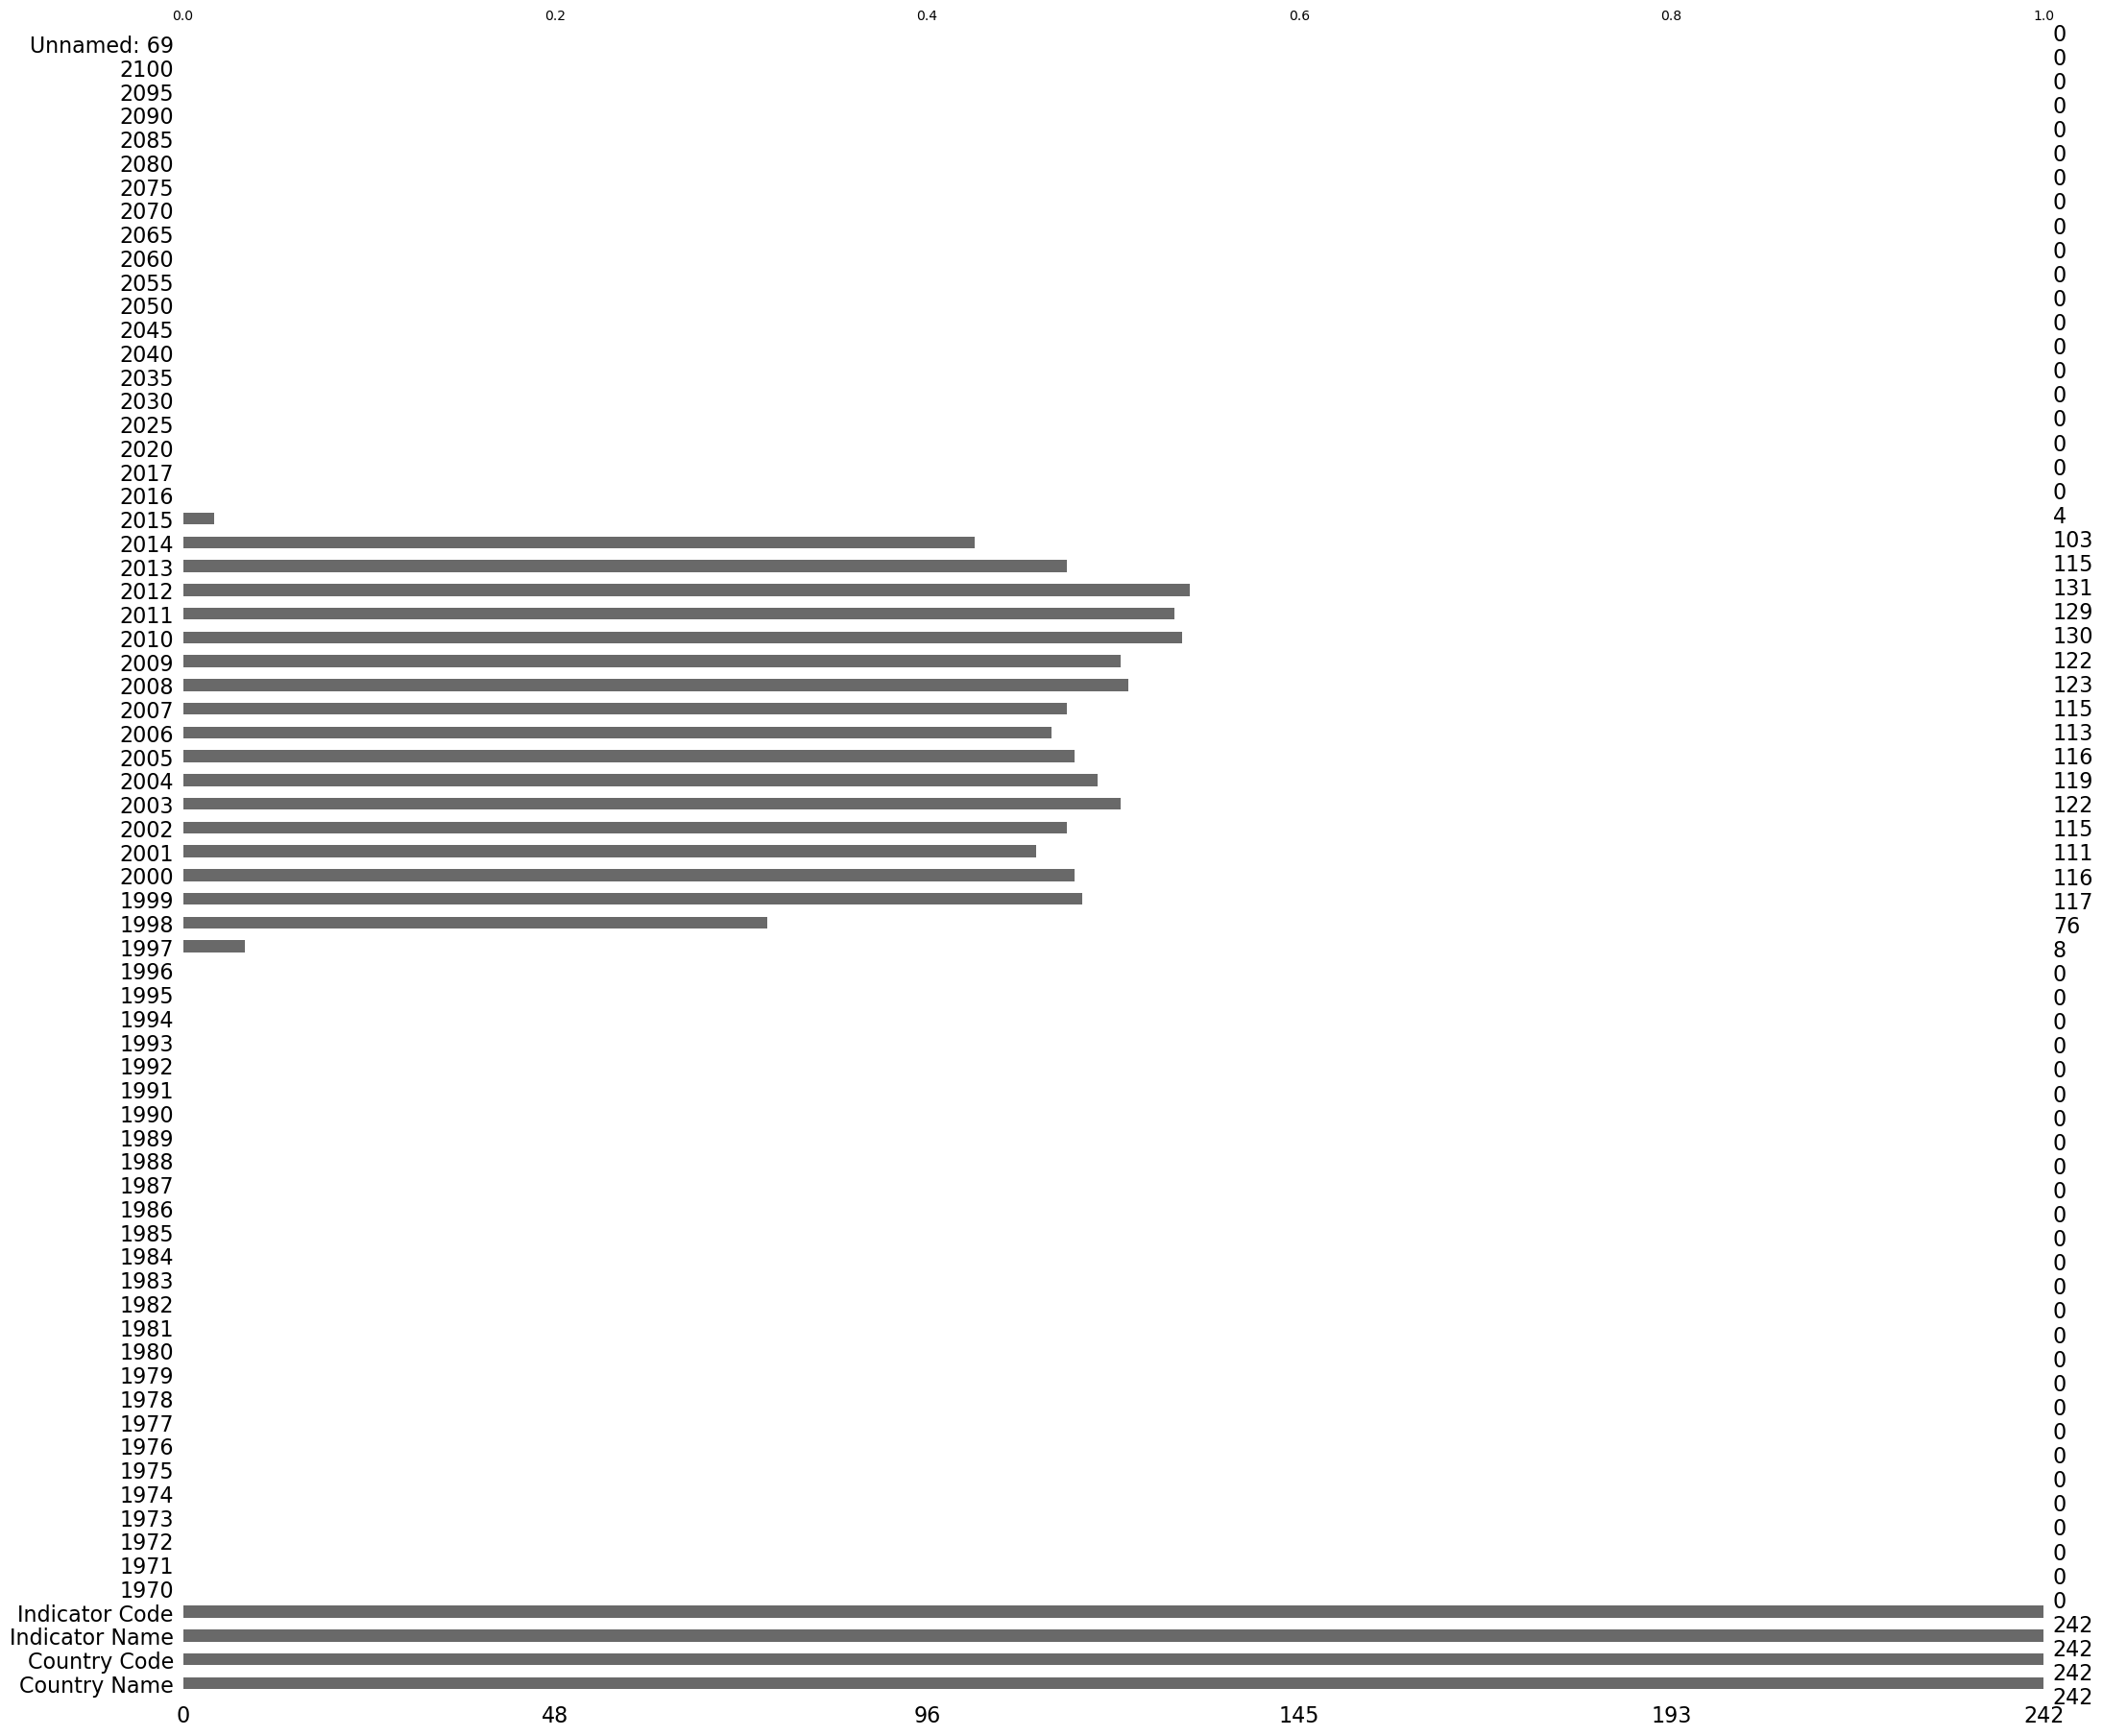

In [110]:
df = data_df.loc[data_df["Indicator Code"] == "UIS.TEP.5.B", :]
msno.bar(df)

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [112]:
indicateurs.append("UIS.TEP.5.B")

In [113]:
series_df.loc[(series_df["Long definition"].str.contains("Total enrolment in bachelors or equivalent programmes", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3539,UIS.TEP.6,Tertiary,Percentage of all students in tertiary educati...,NaN,Total enrolment in bachelors or equivalent pro...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
data_df.loc[data_df["Indicator Code"] == "UIS.TEP.6", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [116]:
indicateurs.append("UIS.TEP.6")

In [117]:
series_df.loc[(series_df["Long definition"].str.contains("Total enrolment in masters or equivalent programmes", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3542,UIS.TEP.7,Tertiary,Percentage of all students in tertiary educati...,NaN,Total enrolment in masters or equivalent progr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
data_df.loc[data_df["Indicator Code"] == "UIS.TEP.7", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [120]:
indicateurs.append("UIS.TEP.7")

In [121]:
series_df.loc[(series_df["Long definition"].str.contains("Total enrolment in doctoral or equivalent programmes", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3545,UIS.TEP.8,Tertiary,Percentage of all students in tertiary educati...,NaN,Total enrolment in doctoral or equivalent prog...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
data_df.loc[data_df["Indicator Code"] == "UIS.TEP.8", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [124]:
indicateurs.append("UIS.TEP.8")

#### Recherchons des données sur le taux de diplomés

##### Dans l'enseignement secondaire

In [127]:
series_df.loc[(series_df["Long definition"].str.contains("Graduation", case=False, na=False))
    & (series_df["Topic"] == "Secondary")]["Long definition"].value_counts()

Long definition
Number of graduates regardless of age in all lower secondary education programmes expressed as a percentage of the population at the theoretical graduation age for lower secondary education. The ratio can exceed 100% due to over-aged and under-aged adolescents who enter lower secondary school for the first time early or late and/or repeat grades.                                                                  1
Number of female graduates regardless of age in all lower secondary education programmes expressed as a percentage of the female population at the theoretical graduation age for lower secondary education. The ratio can exceed 100% due to over-aged and under-aged adolescents who enter lower secondary school for the first time early or late and/or repeat grades.                                                    1
Ratio of the female gross lower secondary graduation ratio to the male gross lower secondary graduation ratio. It is calculated by dividing the female v

In [128]:
series_df.loc[(series_df["Long definition"].str.contains("Number of graduates regardless of age", case=False, na=False))
    & (series_df["Topic"] == "Secondary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3021,UIS.GGR.2,Secondary,Gross graduation ratio from lower secondary ed...,NaN,Number of graduates regardless of age in all l...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
data_df.loc[data_df["Indicator Code"] == "UIS.GGR.2", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [131]:
indicateurs.append("UIS.GGR.2")

##### Dans l'enseignement supérieur

In [133]:
series_df.loc[(series_df["Long definition"].str.contains("Graduation", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]["Long definition"].value_counts()

Long definition
Number of female graduates from first degree programmes (at ISCED 6 and 7) expressed as a percentage of the female population of the theoretical graduation age of the most common first degree programme.                                                                                                                                                                                      1
Number of male graduates from first degree programmes (at ISCED 6 and 7) expressed as a percentage of the male population of the theoretical graduation age of the most common first degree programme.                                                                                                                                                                                          1
Number of graduates from first degree programmes (at ISCED 6 and 7) expressed as a percentage of the population of the theoretical graduation age of the most common first degree programme.                        

In [134]:
series_df.loc[(series_df["Long definition"].str.contains("Number of graduates from first degree programmes", case=False, na=False))
    & (series_df["Topic"] == "Tertiary")]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2331,SE.TER.CMPL.ZS,Tertiary,Gross graduation ratio from first degree progr...,NaN,Number of graduates from first degree programm...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
data_df.loc[data_df["Indicator Code"] == "SE.TER.CMPL.ZS", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [137]:
indicateurs.append("SE.TER.CMPL.ZS")

#### Recherchons des données sur les revenus

##### Revenu moyen par habitant

In [140]:
series_df.loc[(series_df["Long definition"].str.contains("income", case=False, na=False))]["Long definition"].value_counts()

Long definition
Salaries after 10 years of experience refer to the scheduled annual salary of a full-time classroom teacher with the minimum training necessary to be fully qualified plus 10 years of experience. Salaries are in equivalent USD converted using PPPs for private consumption. Statutory salaries refer to scheduled salaries according to official pay scales, while actual salaries refer to the average annual salary earned by a full-time teacher. The salaries reported are gross (total sum paid by the employer) less the employer’s contribution to social security and pension, according to existing salary scales. Salaries are “before tax”, i.e. before deductions for income tax. Teachers’ salaries are one component of teachers’ total compensation. Other benefits, such as regional allowances for teaching in remote areas, family allowances, reduced rates on public transport and tax allowances on the purchase of cultural materials, may also form part of teachers’ total remuneration. The

In [141]:
series_df.loc[(series_df["Long definition"].str.contains("Starting salaries refer to the average scheduled gross salary per year for a full-time upper secondary teacher", case=False, na=False))]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1682,OECD.TSAL.3.E0,Teachers,Annual statutory teacher salaries in public in...,Starting salaries refer to the average schedul...,Starting salaries refer to the average schedul...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Organisation for Economic Co-operation and Dev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
data_df.loc[data_df["Indicator Code"] == "OECD.TSAL.3.E0", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [144]:
indicateurs.append("OECD.TSAL.3.E0")

##### PIB par habitant

In [146]:
series_df.loc[(series_df["Long definition"].str.contains("capita", case=False, na=False))
    & (series_df["Long definition"].str.contains("income", case=False, na=False))]["Long definition"].value_counts()

Long definition
GNI per capita (formerly GNP per capita) is the gross national income, converted to U.S. dollars using the World Bank Atlas method, divided by the midyear population. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. GNI, calculated in national currency, is usually converted to U.S. dollars at official exchange rates for comparisons across economies, although an alternative rate is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate actually applied in international transactions. To smooth fluctuations in prices and exchange rates, a special Atlas method of conversion is used by the World Bank. This applies a conversion factor that averages the exchange rate for a given year and the two preceding years, adjusted for differences in rates o

In [147]:
series_df.loc[(series_df["Long definition"].str.contains("GNI per capita ", case=False, na=False))]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1668,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669,NY.GNP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI per capita, PPP (current international $)",NaN,GNI per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
data_df.loc[data_df["Indicator Code"] == "NY.GNP.PCAP.CD", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [150]:
indicateurs.append("NY.GNP.PCAP.CD")

#### Recherchons des données démographiques

##### Proportion de la population agée de 15 à 24ans (niveau lycée ou universitaire)

In [153]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population", case=False, na=False))
    & (series_df["Long definition"].str.contains("15-", case=False, na=False))
    & (series_df["Long definition"].str.contains("secondary", case=False, na=False))]["Long definition"].value_counts()

Long definition
Percentage of population age 15-19 with secondary schooling. Completed Secondary                           1
Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)    1
Name: count, dtype: int64

In [154]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population age 15-19 with secondary schooling. T", case=False, na=False))]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
211,BAR.SEC.ICMP.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with second...,Percentage of population age 15-19 with second...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
data_df.loc[data_df["Indicator Code"] == "BAR.SEC.ICMP.1519.ZS", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [157]:
indicateurs.append("BAR.SEC.ICMP.1519.ZS")

In [158]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population", case=False, na=False))
    & (series_df["Long definition"].str.contains("15-", case=False, na=False))
    & (series_df["Long definition"].str.contains("tertiary", case=False, na=False))]["Long definition"].value_counts()

Long definition
Percentage of population age 15-19 with tertiary schooling. Completed Tertiary                           1
Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)    1
Name: count, dtype: int64

In [159]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population age 15-19 with tertiary schooling. T", case=False, na=False))]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
301,BAR.TER.ICMP.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with tertia...,Percentage of population age 15-19 with tertia...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
data_df.loc[data_df["Indicator Code"] == "BAR.TER.ICMP.1519.ZS", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [162]:
indicateurs.append("BAR.TER.ICMP.1519.ZS")

In [163]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population", case=False, na=False))
    & (series_df["Long definition"].str.contains("20-", case=False, na=False))
    & (series_df["Long definition"].str.contains("secondary", case=False, na=False))]["Long definition"].value_counts()

Long definition
Percentage of population age 20-24 with secondary schooling. Completed Secondary                           1
Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)    1
Name: count, dtype: int64

In [164]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population age 20-24 with secondary schooling. T", case=False, na=False))]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
215,BAR.SEC.ICMP.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with second...,Percentage of population age 20-24 with second...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
data_df.loc[data_df["Indicator Code"] == "BAR.SEC.ICMP.2024.ZS", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [167]:
indicateurs.append("BAR.SEC.ICMP.2024.ZS")

In [168]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population", case=False, na=False))
    & (series_df["Long definition"].str.contains("20-", case=False, na=False))
    & (series_df["Long definition"].str.contains("tertiary", case=False, na=False))]["Long definition"].value_counts()

Long definition
Percentage of population age 20-24 with tertiary schooling. Completed Tertiary                           1
Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)    1
Name: count, dtype: int64

In [169]:
series_df.loc[(series_df["Long definition"].str.contains("Percentage of population age 20-24 with tertiary schooling. T", case=False, na=False))]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
305,BAR.TER.ICMP.2024.ZS,Attainment,Barro-Lee: Percentage of population age 20-24 ...,Percentage of population age 20-24 with tertia...,Percentage of population age 20-24 with tertia...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
data_df.loc[data_df["Indicator Code"] == "BAR.TER.ICMP.2024.ZS", :].shape[0]

242

L'indicateur est présent pour 242 lignes, ce qui est cohérent avec ce que présente le dataset "EdStatsCountry"

In [172]:
indicateurs.append("BAR.TER.ICMP.2024.ZS")

## Création de notre dataframe d'études
Pour cela nous sélectionnerons toutes les lignes du dataframe dont l'"Indicator Code" est présent dans la liste que nous avons créée précédemment

In [174]:
df = data_df[data_df["Indicator Code"].isin(indicateurs)]
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
147,Arab World,ARB,Annual statutory teacher salaries in public in...,OECD.TSAL.3.E0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,Arab World,ARB,Barro-Lee: Percentage of population age 15-19 ...,BAR.SEC.ICMP.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,Arab World,ARB,Barro-Lee: Percentage of population age 15-19 ...,BAR.TER.ICMP.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.SEC.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,Arab World,ARB,Barro-Lee: Percentage of population age 20-24 ...,BAR.TER.ICMP.2024.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Supprimons les colonnes "Country Code" et "Indicator Code" qui n'apportent aucune plus-value

In [176]:
df = df.drop(["Country Code", "Indicator Code"], axis=1)

<Axes: >

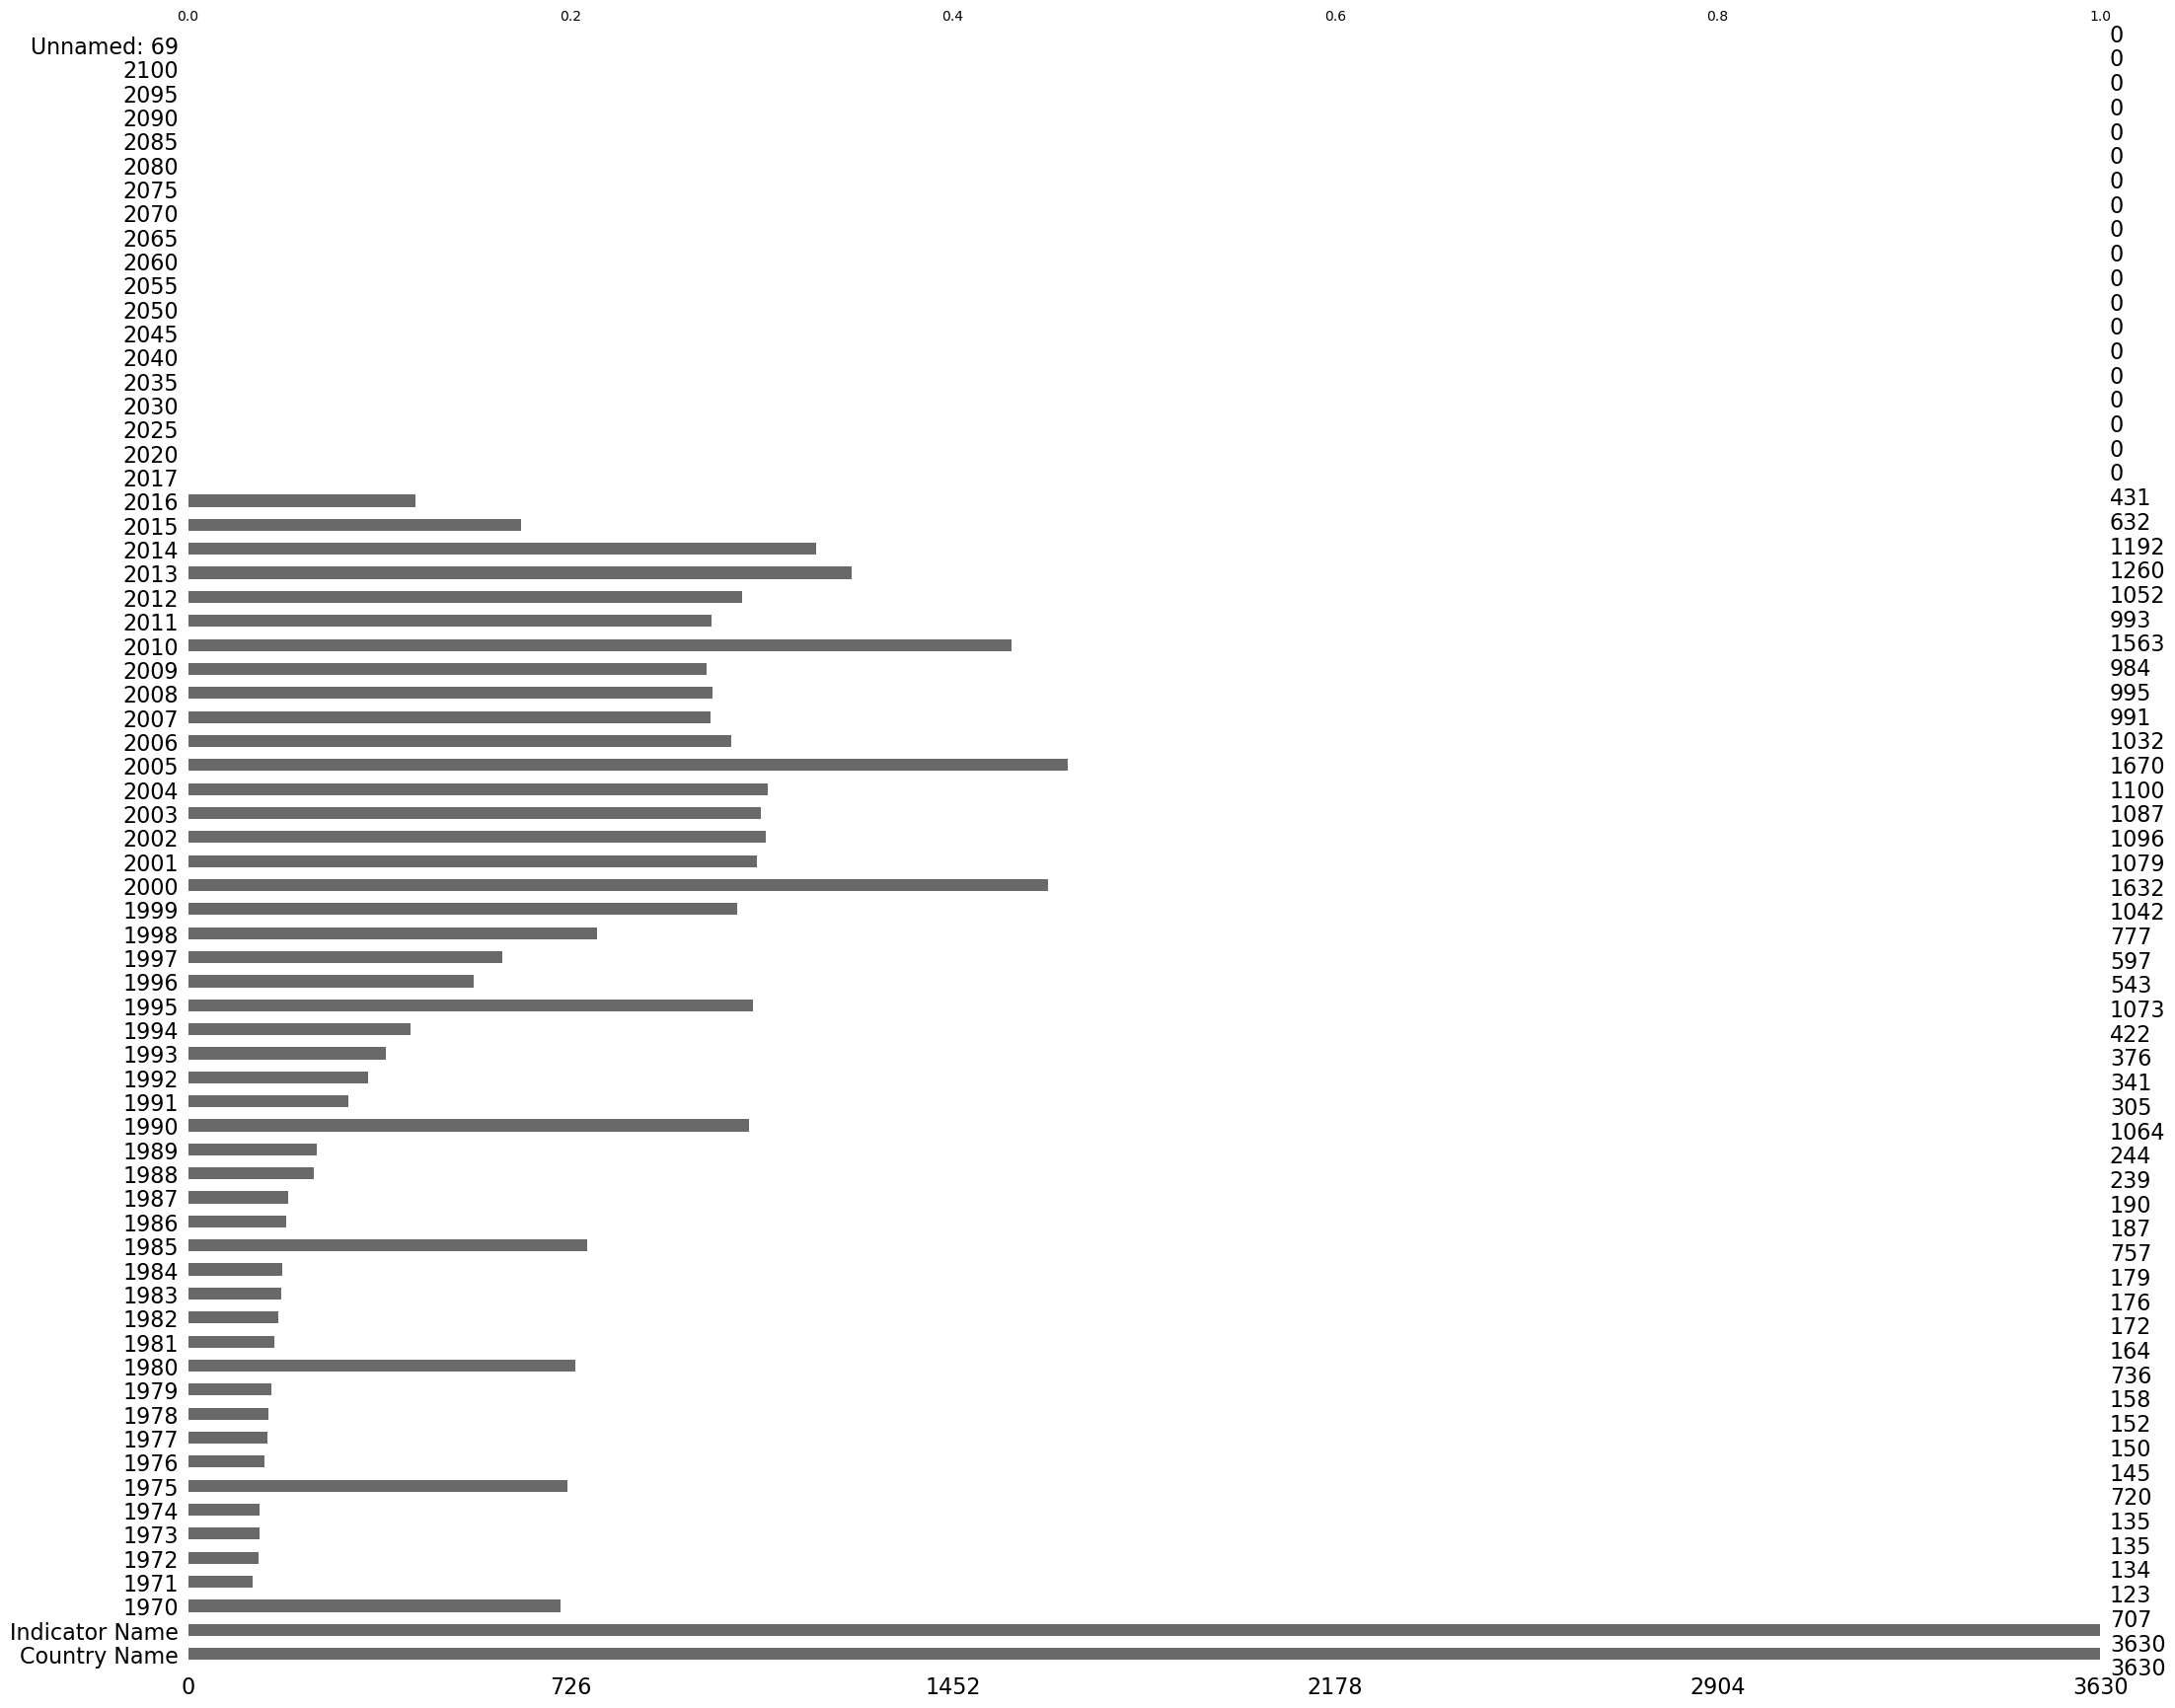

In [275]:
msno.bar(df)

In [293]:
annees = df.columns.to_list()
annees

['Country Name',
 'Indicator Name',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100',
 'Unnamed: 69']

In [295]:
annees.remove('Country Name')
annees.remove('Indicator Name')
annees.remove('Unnamed: 69')
annees

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100']

In [297]:
df = df.melt(id_vars=["Country Name", "Indicator Name"], 
             value_vars=annees,
             var_name="Year", value_name="Values")
df

,Country Name,Indicator Name,Year,Values
0,Arab World,Annual statutory teacher salaries in public in...,1970,NaN
1,Arab World,Barro-Lee: Percentage of population age 15-19 ...,1970,NaN
2,Arab World,Barro-Lee: Percentage of population age 15-19 ...,1970,NaN
3,Arab World,Barro-Lee: Percentage of population age 20-24 ...,1970,NaN
4,Arab World,Barro-Lee: Percentage of population age 20-24 ...,1970,NaN
...,...,...,...,...
235945,Zimbabwe,Percentage of all students in tertiary educati...,2100,NaN
235946,Zimbabwe,Percentage of all students in tertiary educati...,2100,NaN
235947,Zimbabwe,Percentage of all students in tertiary educati...,2100,NaN
235948,Zimbabwe,Percentage of all students in tertiary educati...,2100,NaN


In [303]:
df_gb_country = df.groupby("Country Name")
df_gb_country

In [301]:
msno.matrix(df_gb_country)

AttributeError: 'DataFrameGroupBy' object has no attribute 'shape'

## Analysons notre nouveau dataframe

### Premièrement, les valeurs manquantes

<Axes: >

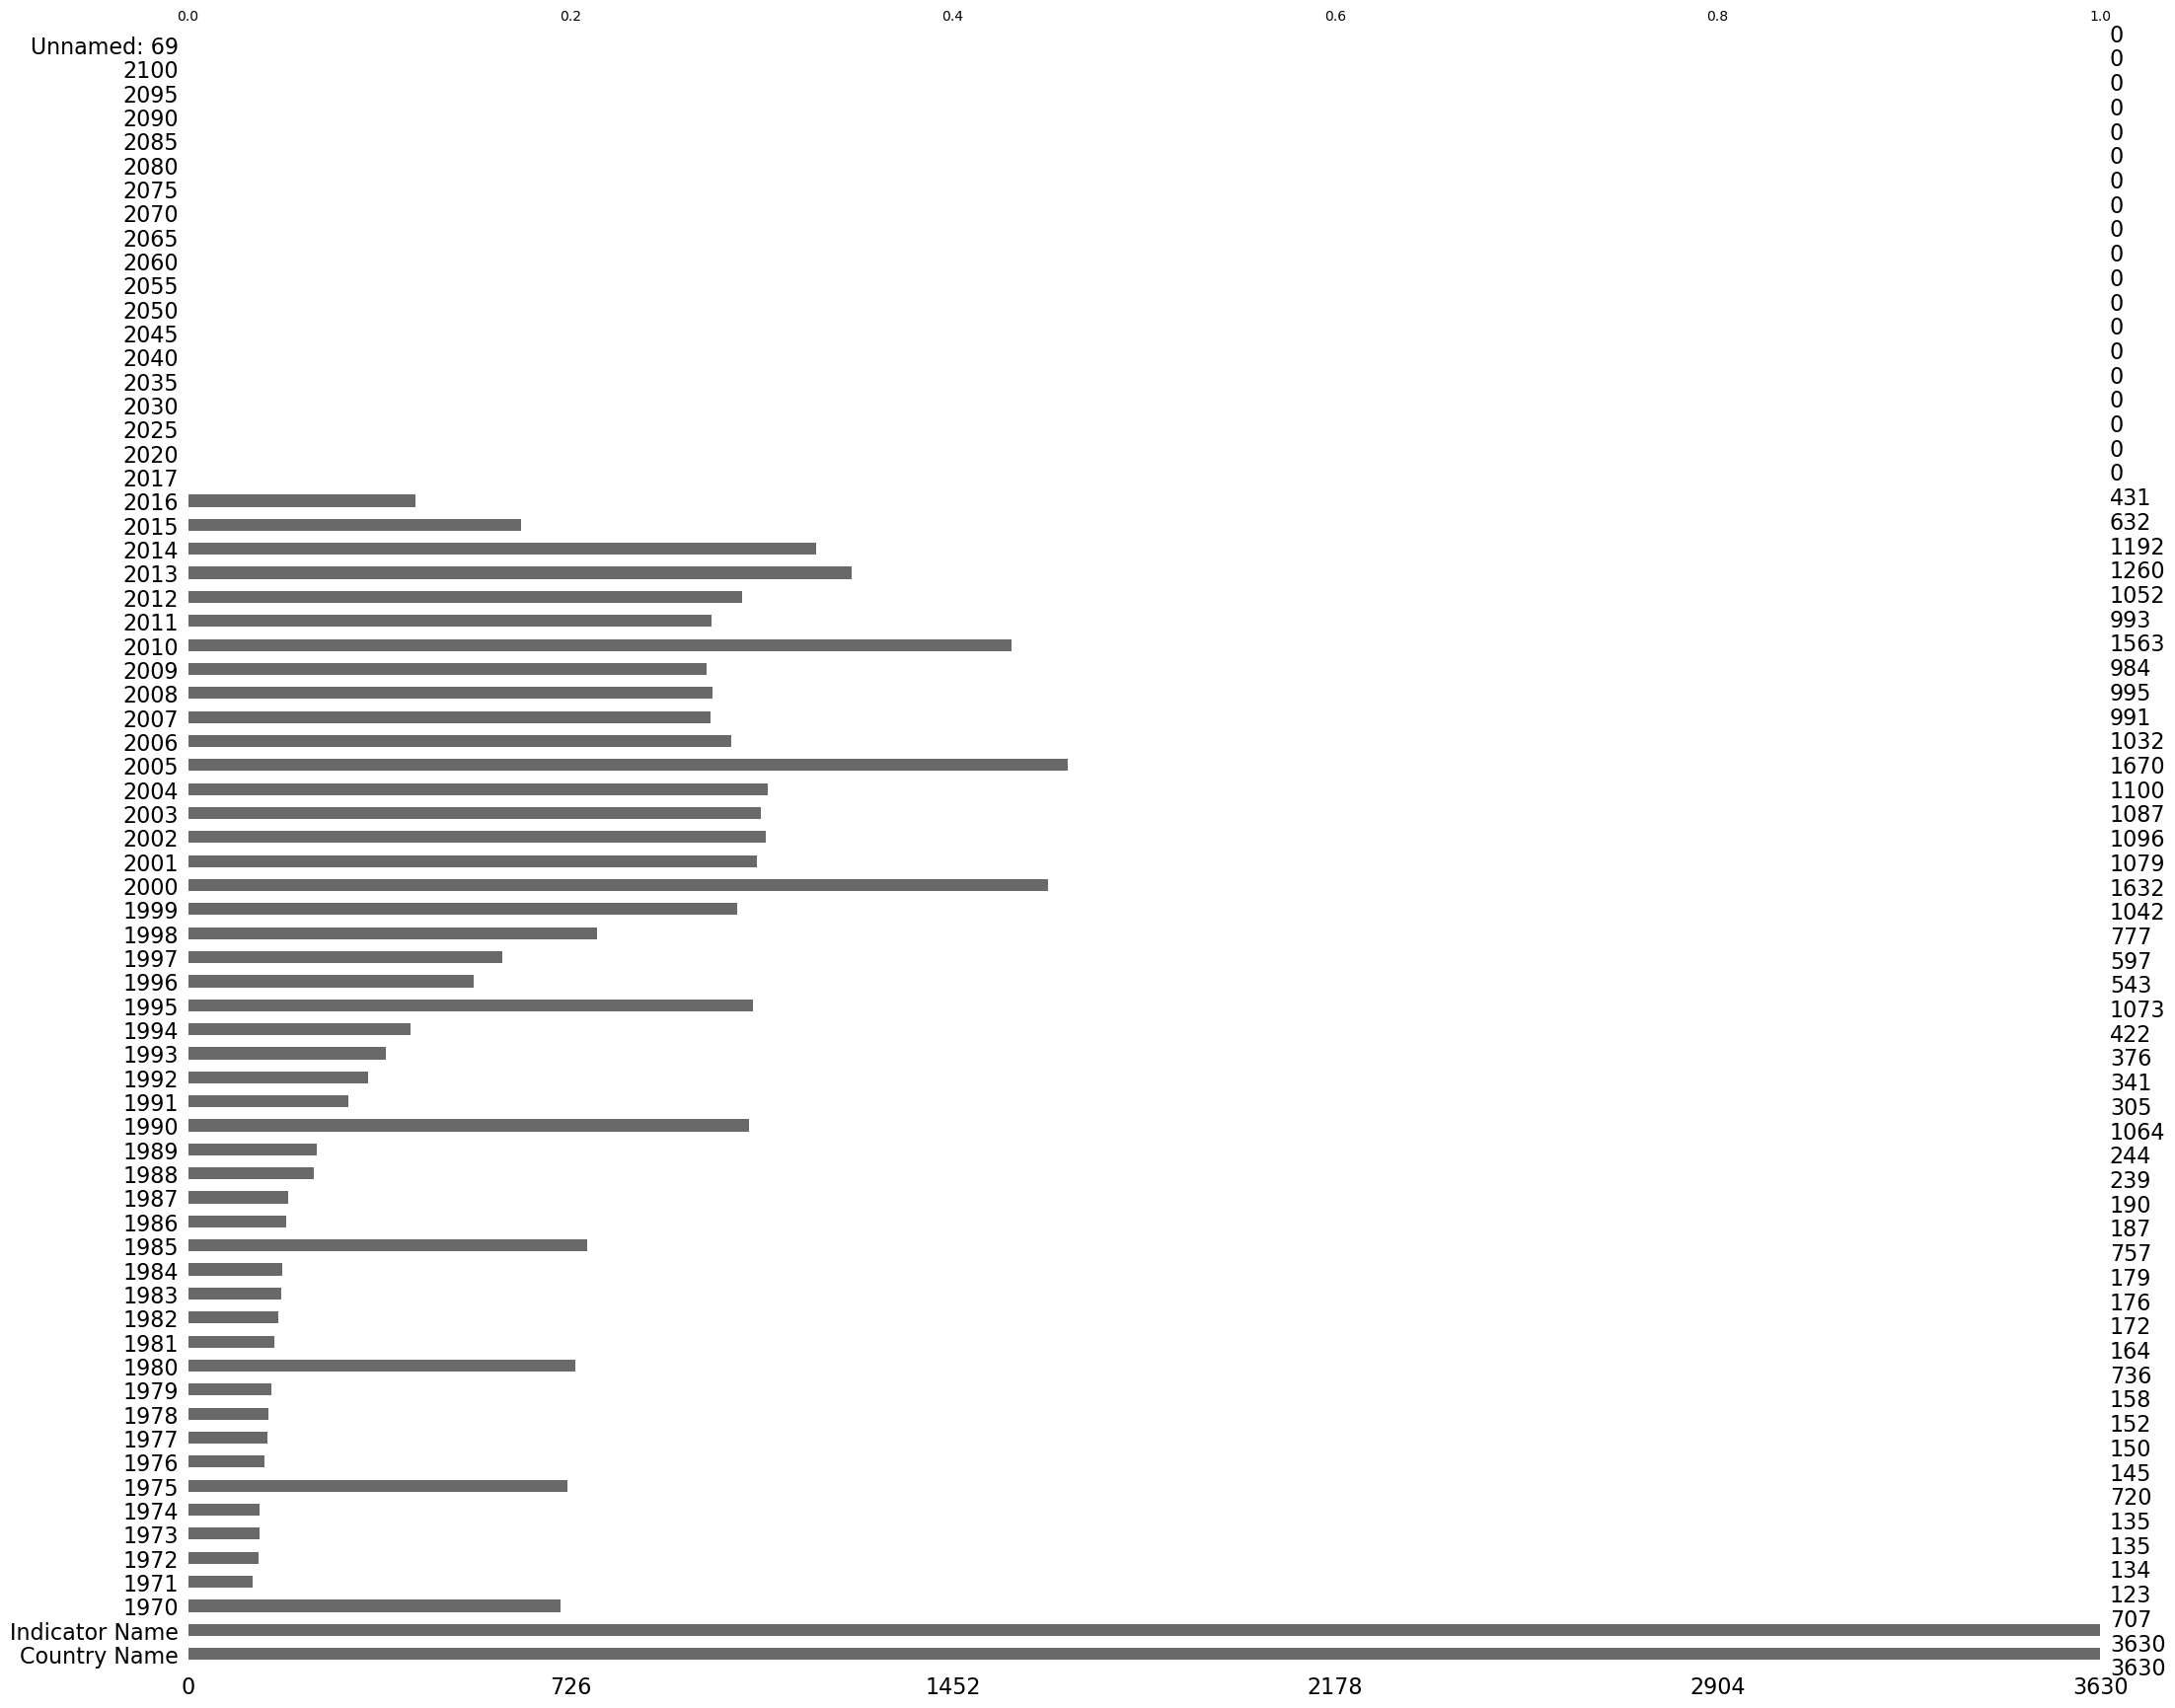

In [181]:
msno.bar(df)

A la lecture du graphique précédent, nous constatons que plusieurs colonnes sont totalement vides, supprimons les

In [183]:
empty_columns = df.columns[df.isnull().all()]
df = df.drop(columns=empty_columns)

Vérifions

<Axes: >

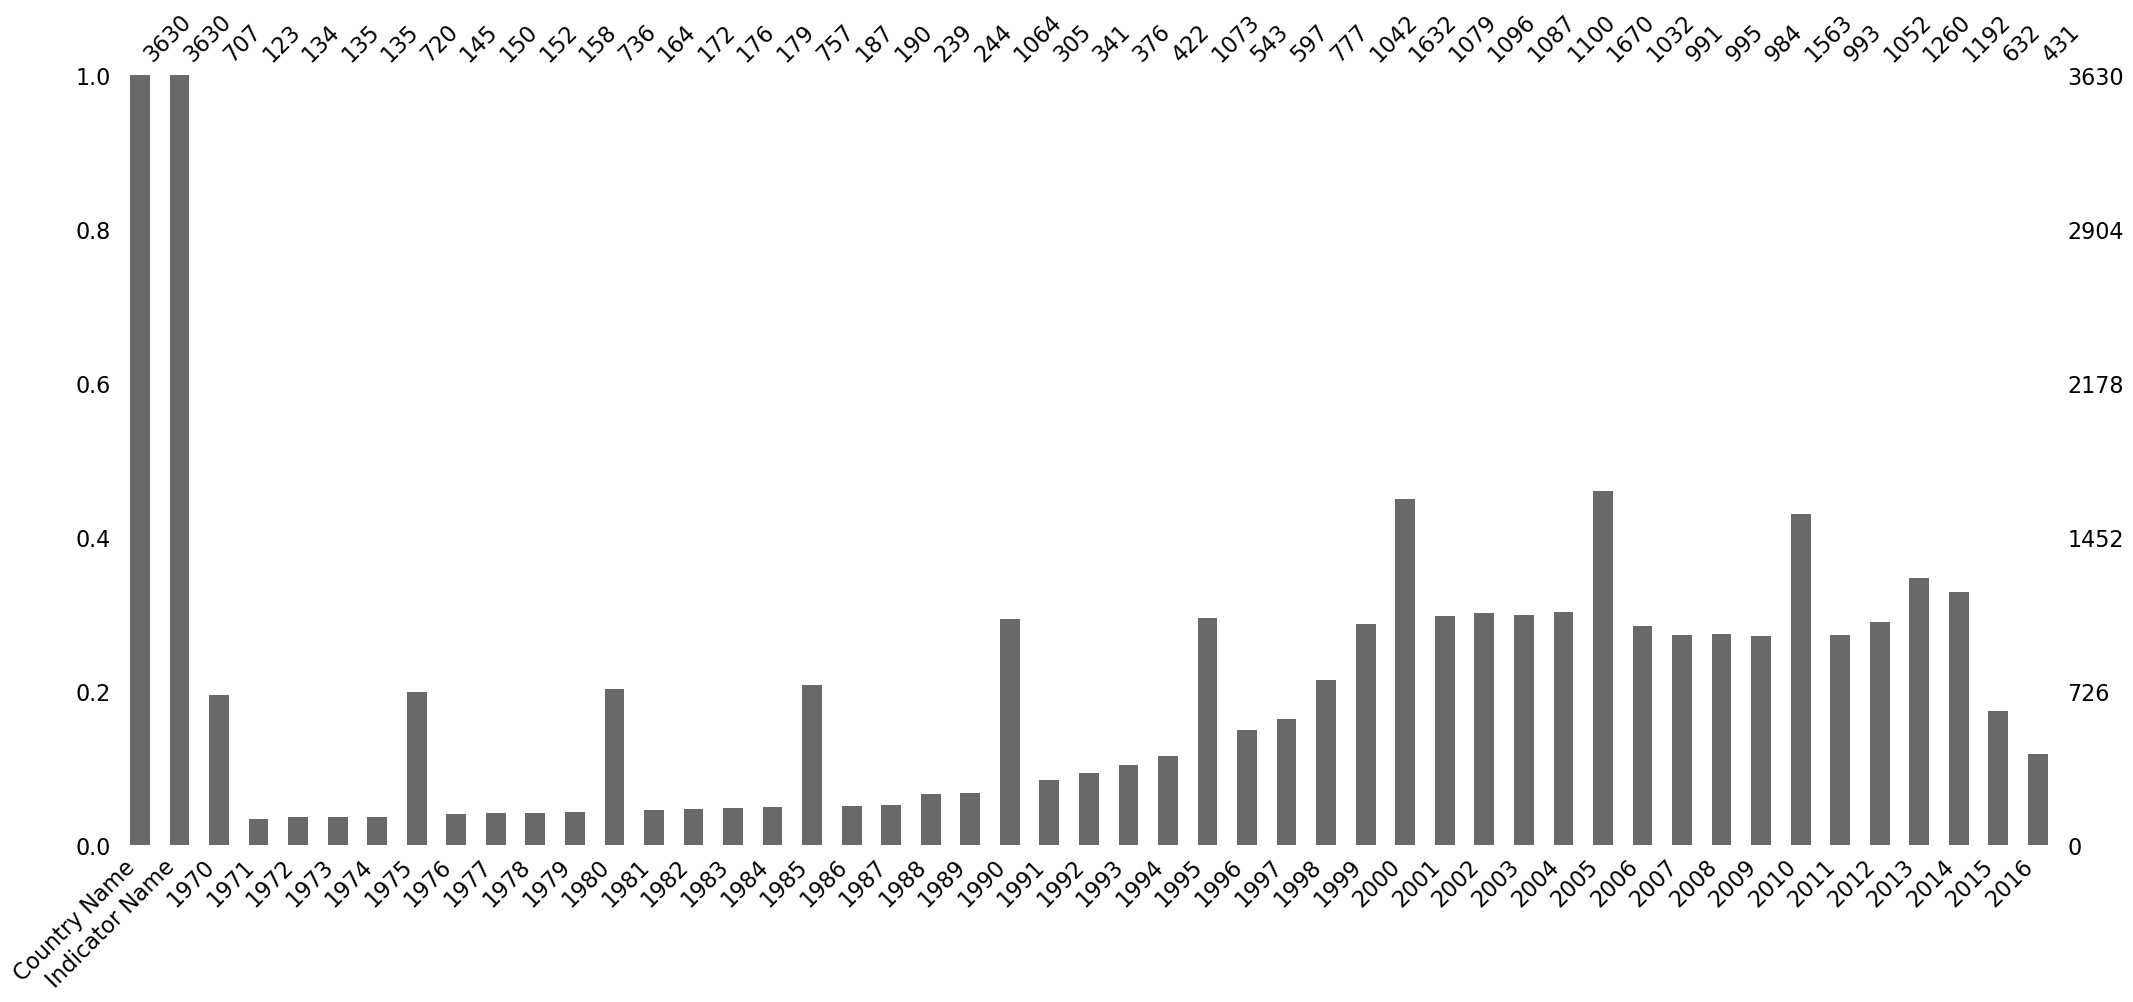

In [185]:
msno.bar(df)

<Axes: >

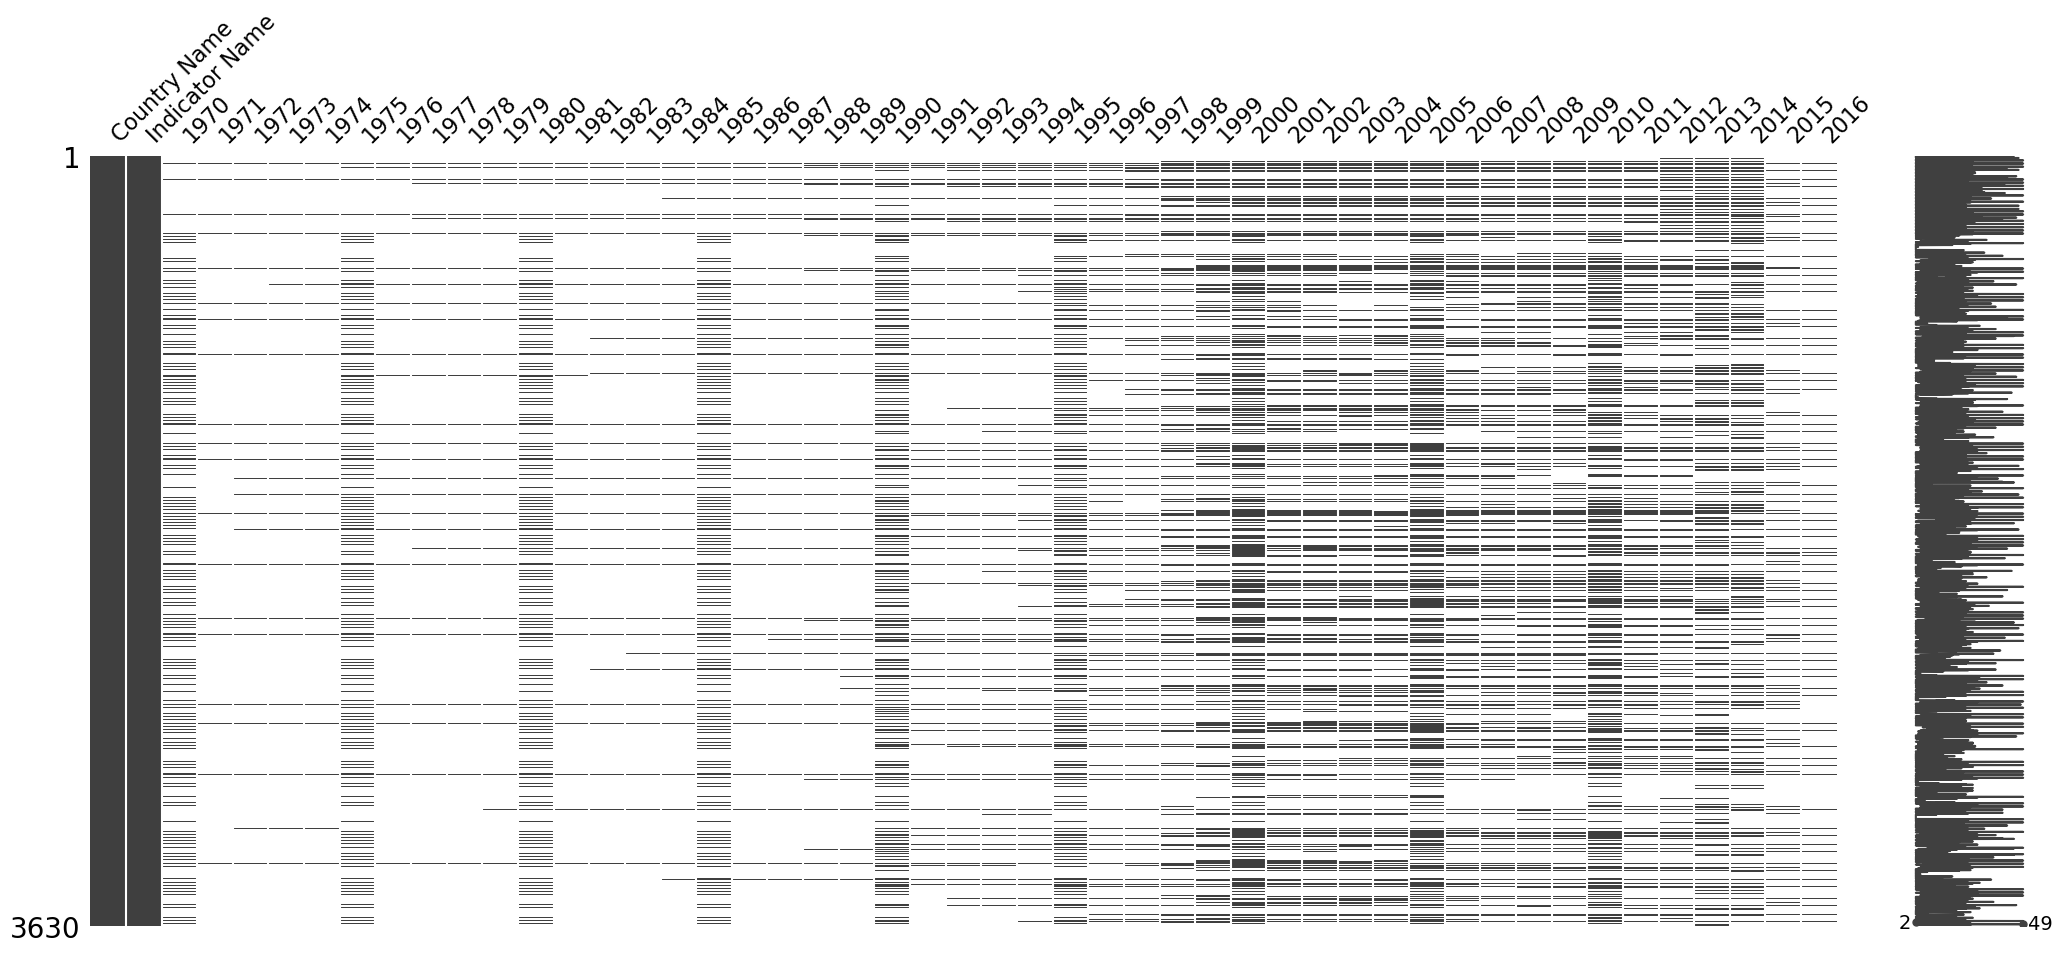

In [287]:
msno.matrix(df)

Nos colonnes ont bien disparues

### Deuxièmement, 
En analysant les valeurs manquantes, nous avons également constaté que nous avons plus de valeurs une fois tous les 5ans, matérialisé par une barre plus grande sur le graphique précédent. Cela semble indiquer que certains indicateurs ne sont calculés qu'une fois tous les 5 ans

Essayons de mettre cela en évidence

In [188]:
df.groupby("Indicator Name").sum()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary,Arab WorldEast Asia & PacificEast Asia & Pacif...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.311346e+05,8.391599e+05,9.482856e+05,9.576142e+05,9.716502e+05,9.688684e+05,9.719685e+05,1.074720e+06,1.159837e+06,0.000000e+00
Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary),Arab WorldEast Asia & PacificEast Asia & Pacif...,4497.250000,0.000000,0.000000,0.000000,0.000000,5331.870000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,9.303570e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary),Arab WorldEast Asia & PacificEast Asia & Pacif...,171.440000,0.000000,0.000000,0.000000,0.000000,212.820000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,4.563900e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary),Arab WorldEast Asia & PacificEast Asia & Pacif...,4389.710000,0.000000,0.000000,0.000000,0.000000,4867.480000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,8.202220e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),Arab WorldEast Asia & PacificEast Asia & Pacif...,905.190000,0.000000,0.000000,0.000000,0.000000,1212.020000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.221400e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"GNI per capita, Atlas method (current US$)",Arab WorldEast Asia & PacificEast Asia & Pacif...,117287.986083,127865.116672,182188.138369,223938.986886,277932.728664,326394.672592,355267.220791,380954.669156,428168.805142,...,2.932005e+06,3.061086e+06,2.822968e+06,2.783423e+06,2.874303e+06,3.009450e+06,3.129518e+06,2.929601e+06,2.799007e+06,2.436964e+06
"Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%)",Arab WorldEast Asia & PacificEast Asia & Pacif...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.972503e+03,2.092110e+03,2.320263e+03,2.069703e+03,2.277177e+03,2.221170e+03,2.194558e+03,2.304157e+03,1.675781e+03,6.413874e+01
"Gross graduation ratio from lower secondary education, both sexes (%)",Arab WorldEast Asia & PacificEast Asia & Pacif...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.912049e+03,4.591253e+03,4.891923e+03,4.629448e+03,4.408463e+03,4.269479e+03,7.071863e+03,6.606972e+03,6.769001e+02,0.000000e+00
Internet users (per 100 people),Arab WorldEast Asia & PacificEast Asia & Pacif...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.820101e+03,6.428460e+03,7.002601e+03,7.720669e+03,8.397087e+03,9.020324e+03,9.609478e+03,1.007665e+04,1.075087e+04,1.133791e+04


On constate en effet que l'indicateur "Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)", par exemple, a des valeurs une fois toutes les 5 ans, ce qui corrobore notre hypothèse.

Pour traiter les informations manquantes, voici quelques pistes :
https://chatgpt.com/c/66f1bc7f-2b08-8005-bc55-a7f2f13cf879

In [191]:
df.interpolate(method='linear', axis=0, limit_direction="both", inplace=True)

/tmp/ipykernel_101135/2675101396.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', axis=0, limit_direction="both", inplace=True)


<Axes: >

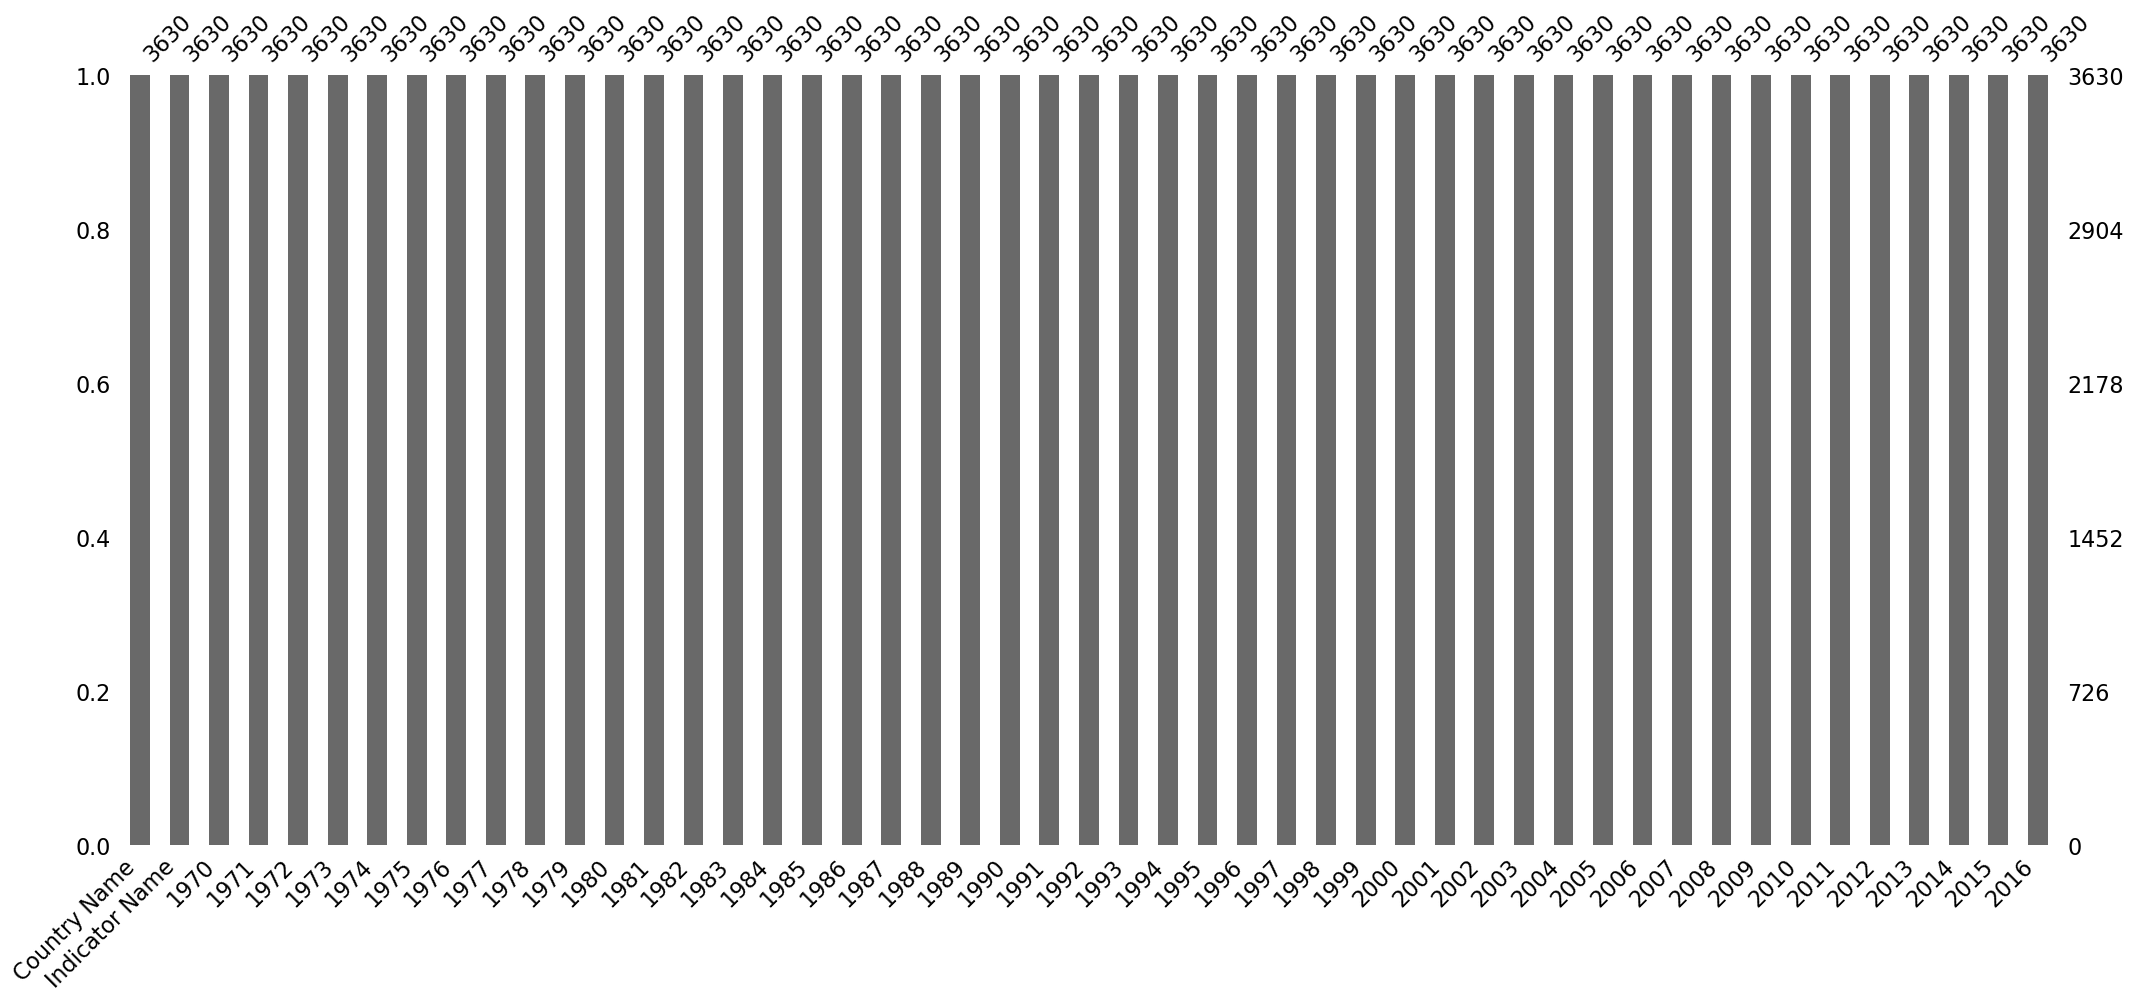

In [192]:
msno.bar(df)

### Troisièmement,

Notre startup propose des contenus en ligne, aussi les données des années avant 1990-1995 semblent peu pertinentes.
Pour traiter cela, nous allons agréger les colonnes pays, indicateur et année avant de supprimer les années inintéressantes

In [194]:
annees = [str(i) for i in range(1970, 2017)]

In [300]:
df = df.melt(id_vars=["Country Name", "Indicator Name"], 
             value_vars=a,
             var_name="Year", value_name="Values")
df.head(30)

,Country Name,Indicator Name,Year,Values
0,Arab World,Annual statutory teacher salaries in public in...,1970,327.231429
1,Arab World,Barro-Lee: Percentage of population age 15-19 ...,1970,327.231429
2,Arab World,Barro-Lee: Percentage of population age 15-19 ...,1970,327.231429
3,Arab World,Barro-Lee: Percentage of population age 20-24 ...,1970,327.231429
4,Arab World,Barro-Lee: Percentage of population age 20-24 ...,1970,327.231429
5,Arab World,"GNI per capita, Atlas method (current US$)",1970,327.231429
6,Arab World,Gross graduation ratio from first degree progr...,1970,250.692686
7,Arab World,Gross graduation ratio from lower secondary ed...,1970,174.153943
8,Arab World,Internet users (per 100 people),1970,97.615201
9,Arab World,"Net enrolment rate, secondary, both sexes (%)",1970,21.076458


In [193]:
df["Year"] = pd.to_numeric(df["Year"])

In [194]:
df = df.loc[df["Year"] > 1990, :]

<Axes: >

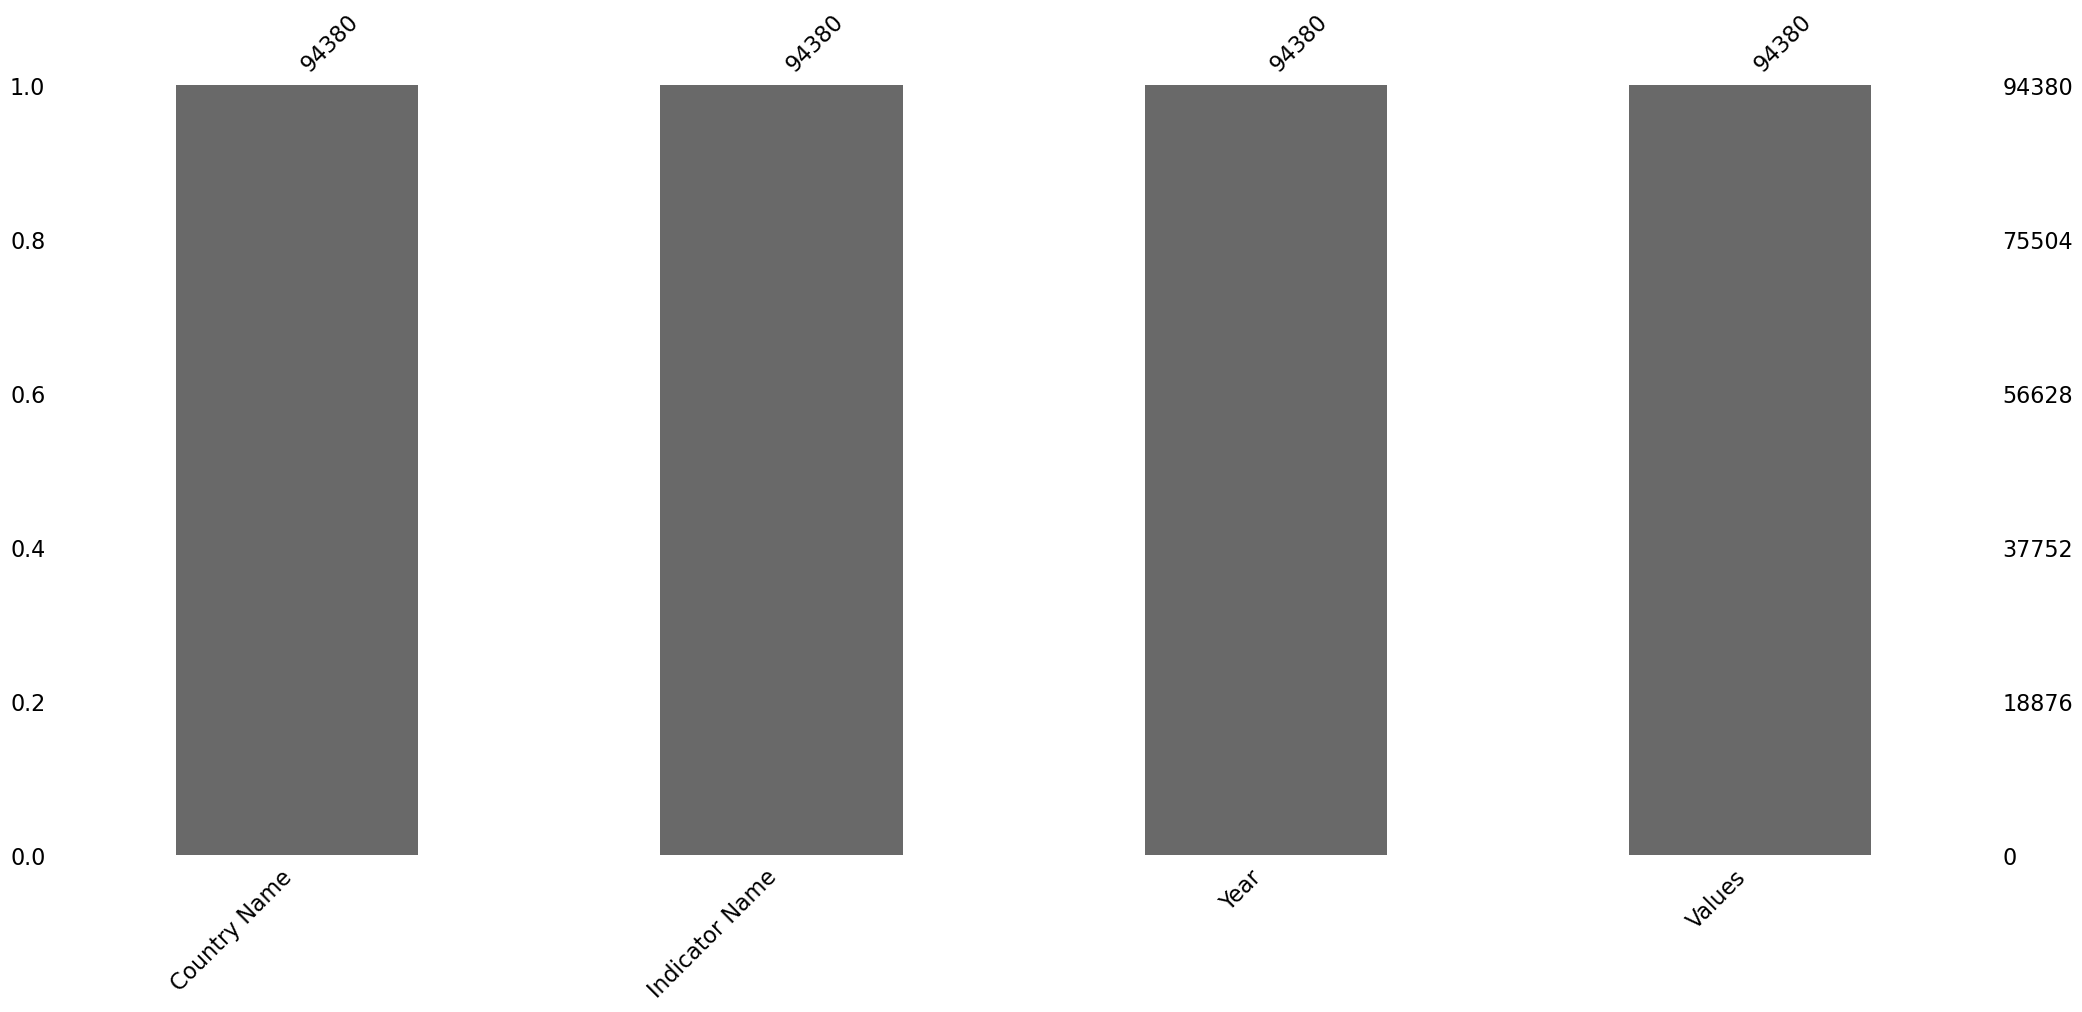

In [195]:
msno.bar(df)

# Etape 3 : Créez un dataframe dans le but de mener une analyse

In [307]:
data = df.pivot_table(index="Country Name", columns=["Indicator Name", "Year"], values="Values", aggfunc="sum")
data.reset_index()

Indicator Name        Country Name  \
Year                                 
0                      Afghanistan   
1                          Albania   
2                          Algeria   
3                   American Samoa   
4                          Andorra   
..                             ...   
237             West Bank and Gaza   
238                          World   
239                    Yemen, Rep.   
240                         Zambia   
241                       Zimbabwe   

Indicator Name Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary  \
Year                                                                                                        1991   
0                                                       22.608737                                                  
1                                                      320.652184                                                  
2                                                     1466.666667                                                  
3                                                       21.529876                                                  
4                                                      342.302786                                                  
..                                                            ...                                                  
237                                                    226.666667                                                  
238                                                    725.720721                                                  
239                                                    296.666667                                                  
240                                                    366.666667                                                  
241                                                    710.000000                                                  

Indicator Name                                                                 \
Year                   1992         1993         1994        1995        1996   
0                 17.176987    18.352508    22.497811   10.796948   48.318703   
1                229.294247   244.588127   305.624453   65.690000  702.079676   
2               1360.000000  1253.333333  1206.666667   39.848896  251.791378   
3                 11.280591     7.429390     4.687899    8.893006    0.481040   
4                177.874624   115.673937    71.250228  137.938861    1.162928   
..                      ...          ...          ...         ...         ...   
237              222.229949   200.015145    96.622700    7.923536  859.436327   
238              777.397692   791.084445   823.175275  872.567940  914.626834   
239              430.557487   387.503786   301.655675   18.898346  683.333333   
240              406.666667   403.333333   356.666667   48.818182   66.746905   
241              593.333333   560.000000   373.336157   50.742348  402.503779   

Indicator Name                                        ...  \
Year                  1997         1998         1999  ...   
0                44.544929    48.527366    54.579135  ...   
1               633.636232   687.131842   771.144784  ...   
2               250.250151   255.375888   255.502320  ...   
3                 0.569221     0.784431     0.869690  ...   
4                 2.187235     4.763852     5.282296  ...   
..                     ...          ...          ...  ...   
237             953.728487  1042.185508  1054.614419  ...   
238             922.421693   883.652284   884.609119  ...   
239             756.666667   183.789270   105.725064  ...   
240              66.770263    58.459106    58.480085  ...   
241             402.503887   102.188724    93.883854  ...   

Indicator Name Personal computers (per 100 people)                            \
Year                                          2007         2008     